# Digital Diet & Mental Health Analysis
## A Comprehensive Study of Screen Time Impact on Mental Well-being

**Research Question:** How does screen time affect mental health across different demographics and usage patterns?

**Dataset:** `digital_diet_mental_health.csv` - 2000+ participants with detailed screen usage and mental health metrics

---

### Analysis Overview:
1. **Exploratory Data Analysis (EDA)**
2. **Correlation Analysis** 
3. **Demographic Comparisons**
4. **Statistical Significance Testing**
5. **Regression Modeling**
6. **Results & Insights**

# 1. Environment Setup & Data Loading

In [55]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📚 Libraries imported successfully! 🚀")

📚 Libraries imported successfully! 🚀


In [56]:
# Load dataset
df = pd.read_csv('screenimpact/data/digital_diet_mental_health.csv')

print(f"📊 Dataset loaded successfully!")
print(f"📏 Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\n" + "="*50)
print("First 5 rows:")
df.head()

📊 Dataset loaded successfully!
📏 Shape: 2000 rows, 25 columns

First 5 rows:


,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


# 2. Exploratory Data Analysis (EDA)

## 2.1 Dataset Overview & Data Quality


In [57]:
# Dataset general information
print("📋 DATASET GENERAL INFORMATION")
print("="*40)
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n📊 COLUMN INFORMATION:")
print("="*40)
df.info()

📋 DATASET GENERAL INFORMATION
Total rows: 2000
Total columns: 25
Memory usage: 668.84 KB

📊 COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours 

In [58]:
# Missing data check
print("🔍 MISSING DATA CHECK")
print("="*40)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_info) > 0:
    print("⚠️  Columns with missing data:")
    print(missing_info)
else:
    print("✅ No missing data found! Great!")

print(f"\n📊 Total missing data: {df.isnull().sum().sum()}")


🔍 MISSING DATA CHECK
✅ No missing data found! Great!

📊 Total missing data: 0


## 2.2 Variable Categorization

In [59]:
# Categorize variables by type
print("📂 VARIABLE CATEGORIES")
print("="*40)

# Screen usage variables
screen_vars = ['daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours',
               'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours',
               'work_related_hours', 'entertainment_hours', 'gaming_hours']

# Mental health variables  
mental_health_vars = ['mental_health_score', 'mood_rating', 'stress_level',
                      'weekly_anxiety_score', 'weekly_depression_score']

# Lifestyle variables
lifestyle_vars = ['sleep_duration_hours', 'sleep_quality', 'physical_activity_hours_per_week',
                  'mindfulness_minutes_per_day', 'caffeine_intake_mg_per_day']

# Demographic variables
demographic_vars = ['age', 'gender', 'location_type']

# Health behavior variables
health_vars = ['uses_wellness_apps', 'eats_healthy']

print("🖥️  Screen Usage Variables:", len(screen_vars))
print("🧠 Mental Health Variables:", len(mental_health_vars))
print("😴 Lifestyle Variables:", len(lifestyle_vars))
print("👤 Demographic Variables:", len(demographic_vars))
print("🥗 Health Behavior Variables:", len(health_vars))

📂 VARIABLE CATEGORIES
🖥️  Screen Usage Variables: 9
🧠 Mental Health Variables: 5
😴 Lifestyle Variables: 5
👤 Demographic Variables: 3
🥗 Health Behavior Variables: 2


## 2.3 Descriptive Statistics

In [60]:
# Descriptive statistics for numerical variables
print("📊 NUMERICAL VARIABLES - DESCRIPTIVE STATISTICS")
print("="*50)

# All numerical variables
numeric_vars = screen_vars + mental_health_vars + lifestyle_vars + ['age']

# Basic statistics
stats_summary = df[numeric_vars].describe().round(2)
print("Basic Statistics:")
stats_summary.loc[['mean', 'std', 'min', 'max']]

📊 NUMERICAL VARIABLES - DESCRIPTIVE STATISTICS
Basic Statistics:


,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,mental_health_score,mood_rating,stress_level,weekly_anxiety_score,weekly_depression_score,sleep_duration_hours,sleep_quality,physical_activity_hours_per_week,mindfulness_minutes_per_day,caffeine_intake_mg_per_day,age
mean,6.03,3.02,2.0,1.00,1.50,2.04,2.01,2.47,1.28,49.65,5.59,5.54,9.89,10.05,6.54,5.57,3.09,10.75,148.08,38.81
std,1.97,1.45,1.0,0.49,0.96,1.13,1.12,1.24,0.89,17.55,2.90,2.89,6.03,6.05,1.20,2.83,1.89,7.34,48.86,14.93
min,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,1.00,0.00,0.00,3.00,1.00,0.00,0.00,0.80,13.00
max,13.30,8.40,5.6,2.50,4.70,5.80,5.90,6.80,4.00,80.00,10.00,10.00,20.00,20.00,10.00,10.00,9.70,36.40,364.90,64.00


## 2.4 Demographic Analysis

📊 CATEGORICAL VARIABLES - MODERN ANALYSIS


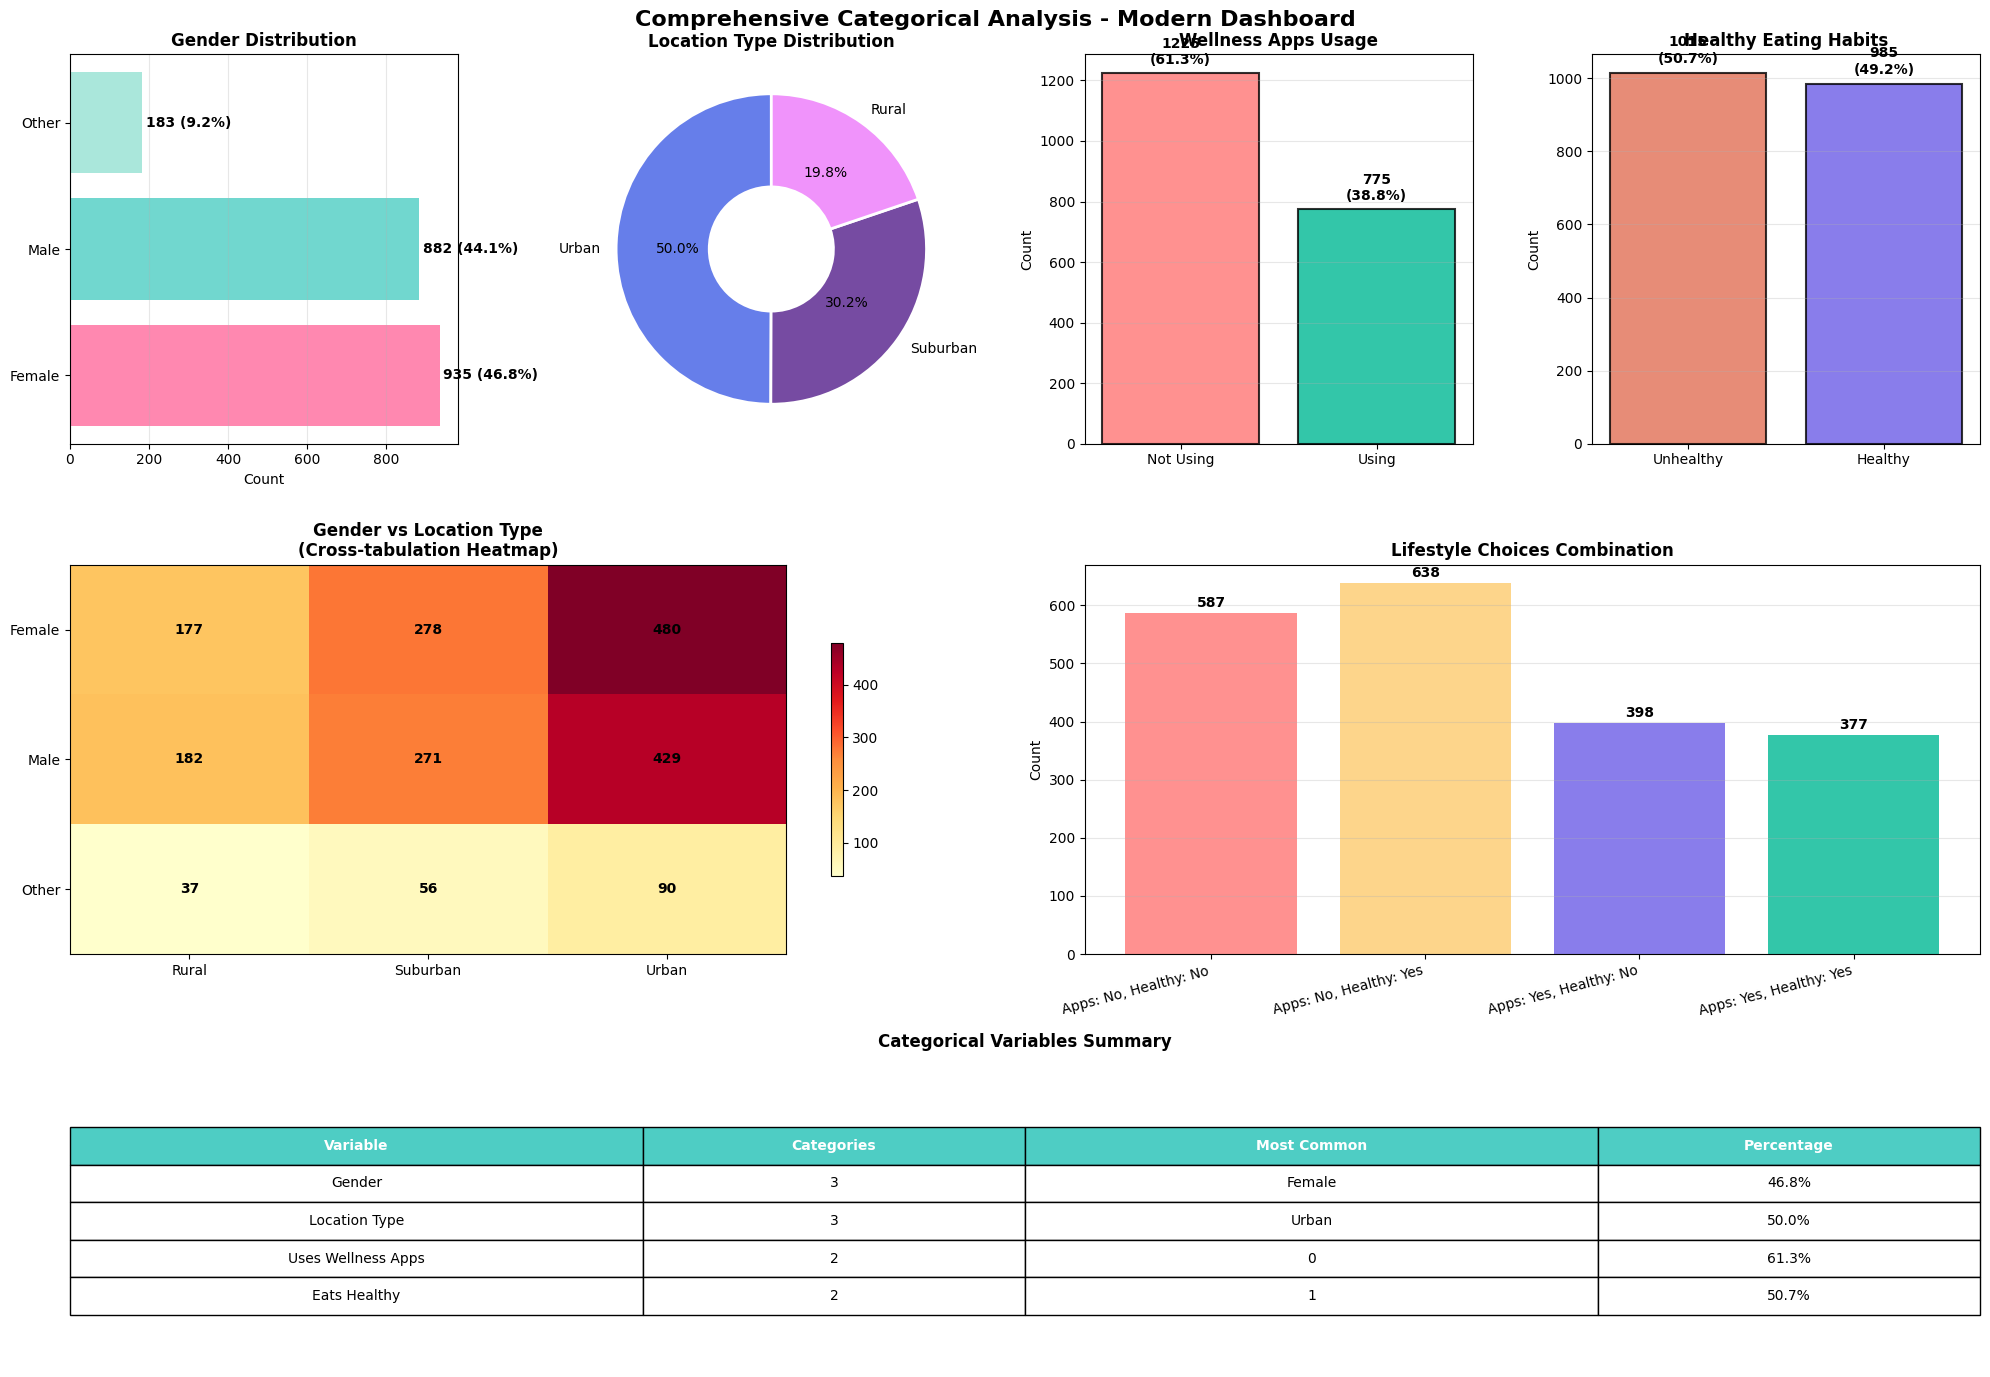


📋 DETAILED CATEGORICAL ANALYSIS:

🎯 GENDER:
   Total categories: 3
   Most common: Female (46.8%)
   Distribution:
     • Female: 935 (46.8%)
     • Male: 882 (44.1%)
     • Other: 183 (9.2%)

🎯 LOCATION TYPE:
   Total categories: 3
   Most common: Urban (50.0%)
   Distribution:
     • Urban: 999 (50.0%)
     • Suburban: 605 (30.2%)
     • Rural: 396 (19.8%)

🎯 USES WELLNESS APPS:
   Total categories: 2
   Most common: 0 (61.3%)
   Distribution:
     • 0: 1225 (61.3%)
     • 1: 775 (38.8%)

🎯 EATS HEALTHY:
   Total categories: 2
   Most common: 1 (50.7%)
   Distribution:
     • 1: 1015 (50.7%)
     • 0: 985 (49.2%)

💡 CROSS-ANALYSIS INSIGHTS:
• Gender-Location balance: 148.2 std deviation
• Wellness-focused individuals: 377 (18.9%)
• Health-conscious ratio: 44.8%


In [61]:
# Modern categorical variable analysis
print("📊 CATEGORICAL VARIABLES - MODERN ANALYSIS")
print("="*50)

# Create a comprehensive figure with modern visualizations
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 4, height_ratios=[2, 2, 1.5], width_ratios=[1, 1, 1, 1])

# 1. Gender distribution - Horizontal bar with gradient effect
ax1 = fig.add_subplot(gs[0, 0])
gender_counts = df['gender'].value_counts()
colors_gender = ['#FF6B9D', '#4ECDC4', '#95E1D3']
bars = ax1.barh(gender_counts.index, gender_counts.values, color=colors_gender, alpha=0.8)
ax1.set_title('Gender Distribution', fontweight='bold', fontsize=12)
ax1.set_xlabel('Count')
# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, gender_counts.values)):
    ax1.text(value + 10, i, f'{value} ({value/len(df)*100:.1f}%)', va='center', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 2. Location type - Donut chart with modern colors
ax2 = fig.add_subplot(gs[0, 1])
location_counts = df['location_type'].value_counts()
colors_location = ['#667eea', '#764ba2', '#f093fb']
wedges, texts, autotexts = ax2.pie(location_counts.values, labels=location_counts.index, 
                                   autopct='%1.1f%%', colors=colors_location, startangle=90,
                                   wedgeprops=dict(width=0.6, edgecolor='white', linewidth=2))
ax2.set_title('Location Type Distribution', fontweight='bold', fontsize=12)

# 3. Wellness apps - Modern count plot
ax3 = fig.add_subplot(gs[0, 2])
wellness_counts = df['uses_wellness_apps'].value_counts()
labels_wellness = ['Not Using', 'Using']
colors_wellness = ['#ff7675', '#00b894']
bars = ax3.bar(labels_wellness, wellness_counts.values, color=colors_wellness, alpha=0.8, 
               edgecolor='black', linewidth=1.5)
ax3.set_title('Wellness Apps Usage', fontweight='bold', fontsize=12)
ax3.set_ylabel('Count')
# Add percentage labels
for bar, value in zip(bars, wellness_counts.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 20, f'{value}\n({value/len(df)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# 4. Healthy eating - Styled bar chart
ax4 = fig.add_subplot(gs[0, 3])
healthy_counts = df['eats_healthy'].value_counts()
labels_healthy = ['Unhealthy', 'Healthy']
colors_healthy = ['#e17055', '#6c5ce7']
bars = ax4.bar(labels_healthy, healthy_counts.values, color=colors_healthy, alpha=0.8,
               edgecolor='black', linewidth=1.5)
ax4.set_title('Healthy Eating Habits', fontweight='bold', fontsize=12)
ax4.set_ylabel('Count')
# Add percentage labels
for bar, value in zip(bars, healthy_counts.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 20, f'{value}\n({value/len(df)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# 5. Cross-tabulation heatmap: Gender vs Location
ax5 = fig.add_subplot(gs[1, :2])
cross_tab = pd.crosstab(df['gender'], df['location_type'])
im = ax5.imshow(cross_tab.values, cmap='YlOrRd', aspect='auto')
ax5.set_xticks(range(len(cross_tab.columns)))
ax5.set_yticks(range(len(cross_tab.index)))
ax5.set_xticklabels(cross_tab.columns)
ax5.set_yticklabels(cross_tab.index)
ax5.set_title('Gender vs Location Type\n(Cross-tabulation Heatmap)', fontweight='bold', fontsize=12)
# Add text annotations
for i in range(len(cross_tab.index)):
    for j in range(len(cross_tab.columns)):
        ax5.text(j, i, cross_tab.values[i, j], ha="center", va="center", color="black", fontweight='bold')
plt.colorbar(im, ax=ax5, shrink=0.6)

# 6. Lifestyle choices combination
ax6 = fig.add_subplot(gs[1, 2:])
lifestyle_combo = df.groupby(['uses_wellness_apps', 'eats_healthy']).size().reset_index(name='count')
lifestyle_combo['label'] = lifestyle_combo.apply(lambda x: f"Apps: {['No', 'Yes'][x['uses_wellness_apps']]}, Healthy: {['No', 'Yes'][x['eats_healthy']]}", axis=1)

colors_combo = ['#ff7675', '#fdcb6e', '#6c5ce7', '#00b894']
bars = ax6.bar(range(len(lifestyle_combo)), lifestyle_combo['count'], color=colors_combo, alpha=0.8)
ax6.set_xticks(range(len(lifestyle_combo)))
ax6.set_xticklabels(lifestyle_combo['label'], rotation=15, ha='right')
ax6.set_title('Lifestyle Choices Combination', fontweight='bold', fontsize=12)
ax6.set_ylabel('Count')
# Add value labels
for bar, value in zip(bars, lifestyle_combo['count']):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 5, f'{value}', ha='center', va='bottom', fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

# 7. Summary statistics table
ax7 = fig.add_subplot(gs[2, :])
ax7.axis('tight')
ax7.axis('off')

# Create summary table
summary_data = []
for var in ['gender', 'location_type', 'uses_wellness_apps', 'eats_healthy']:
    counts = df[var].value_counts()
    mode_value = counts.index[0]
    mode_percent = counts.iloc[0] / len(df) * 100
    summary_data.append([var.replace('_', ' ').title(), len(counts), mode_value, f'{mode_percent:.1f}%'])

summary_df = pd.DataFrame(summary_data, columns=['Variable', 'Categories', 'Most Common', 'Percentage'])
table = ax7.table(cellText=summary_df.values, colLabels=summary_df.columns, 
                  cellLoc='center', loc='center', colWidths=[0.3, 0.2, 0.3, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
# Style the table
for i in range(len(summary_df.columns)):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold', color='white')
ax7.set_title('Categorical Variables Summary', fontweight='bold', fontsize=12, pad=20)

plt.suptitle('Comprehensive Categorical Analysis - Modern Dashboard', fontsize=16, y=0.98, fontweight='bold')
plt.tight_layout()
plt.show()

# Enhanced numerical summaries with insights
print("\n📋 DETAILED CATEGORICAL ANALYSIS:")
print("="*50)
for var in ['gender', 'location_type', 'uses_wellness_apps', 'eats_healthy']:
    counts = df[var].value_counts()
    print(f"\n🎯 {var.upper().replace('_', ' ')}:")
    print(f"   Total categories: {len(counts)}")
    print(f"   Most common: {counts.index[0]} ({counts.iloc[0]/len(df)*100:.1f}%)")
    print(f"   Distribution:")
    for category, count in counts.items():
        print(f"     • {category}: {count} ({count/len(df)*100:.1f}%)")

# Cross-analysis insights
print(f"\n💡 CROSS-ANALYSIS INSIGHTS:")
print(f"• Gender-Location balance: {cross_tab.values.std():.1f} std deviation")
print(f"• Wellness-focused individuals: {len(df[(df['uses_wellness_apps']==1) & (df['eats_healthy']==1)])} ({len(df[(df['uses_wellness_apps']==1) & (df['eats_healthy']==1)])/len(df)*100:.1f}%)")
print(f"• Health-conscious ratio: {(df['uses_wellness_apps'].sum() + df['eats_healthy'].sum())/(2*len(df))*100:.1f}%")

👥 AGE DISTRIBUTION ANALYSIS


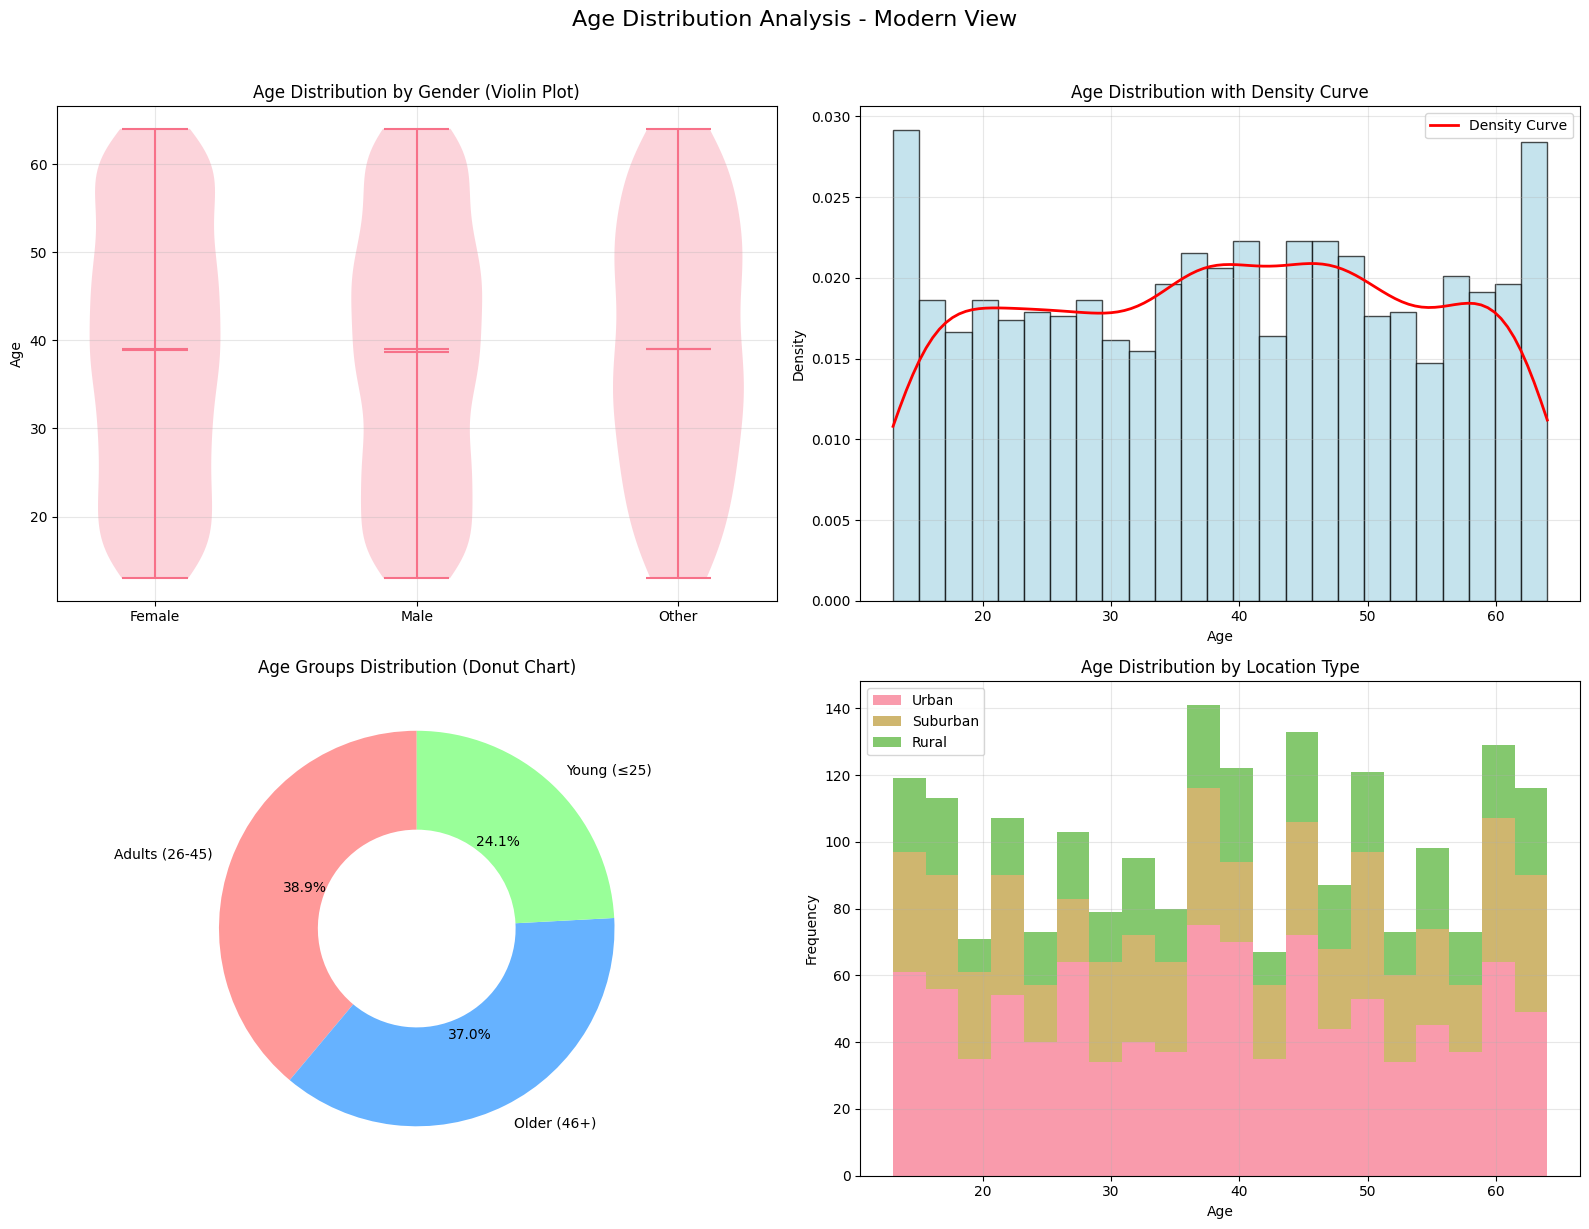


📊 Age Group Distribution:
age_group
Adults (26-45)    778
Older (46+)       739
Young (≤25)       483
Name: count, dtype: int64

Age Statistics:
Minimum age: 13
Maximum age: 64
Mean age: 38.8
Median age: 39.0

🎯 Age Insights by Demographics:
• Female: Mean age 38.9, Std 15.0
• Male: Mean age 38.7, Std 15.0
• Other: Mean age 39.0, Std 14.6
• Urban: Mean age 38.3, Std 14.8
• Suburban: Mean age 39.2, Std 15.2
• Rural: Mean age 39.4, Std 14.9


In [62]:
# Age distribution analysis with modern visualizations
print("👥 AGE DISTRIBUTION ANALYSIS")
print("="*40)

# Create age groups first
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 100], labels=['Young (≤25)', 'Adults (26-45)', 'Older (46+)'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Age Distribution Analysis - Modern View', fontsize=16, y=1.02)

# 1. Violin plot by gender (more informative than simple histogram)
axes[0,0].violinplot([df[df['gender'] == gender]['age'].dropna() for gender in df['gender'].unique()], 
                     positions=range(len(df['gender'].unique())), showmeans=True, showmedians=True)
axes[0,0].set_xticks(range(len(df['gender'].unique())))
axes[0,0].set_xticklabels(df['gender'].unique())
axes[0,0].set_title('Age Distribution by Gender (Violin Plot)')
axes[0,0].set_ylabel('Age')
axes[0,0].grid(True, alpha=0.3)

# 2. Histogram with density curve overlay
axes[0,1].hist(df['age'], bins=25, density=True, alpha=0.7, color='lightblue', edgecolor='black')
# Add density curve
age_values = np.linspace(df['age'].min(), df['age'].max(), 100)
from scipy.stats import gaussian_kde
kde = gaussian_kde(df['age'])
axes[0,1].plot(age_values, kde(age_values), 'r-', linewidth=2, label='Density Curve')
axes[0,1].set_title('Age Distribution with Density Curve')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Density')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Age groups donut chart
age_counts = df['age_group'].value_counts()
colors = ['#FF9999', '#66B2FF', '#99FF99']
wedges, texts, autotexts = axes[1,0].pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%', 
                                        colors=colors, startangle=90, 
                                        wedgeprops=dict(width=0.5))  # Donut effect
axes[1,0].set_title('Age Groups Distribution (Donut Chart)')

# 4. Age distribution by location type (stacked histogram)
location_types = df['location_type'].unique()
age_by_location = [df[df['location_type'] == loc]['age'] for loc in location_types]
axes[1,1].hist(age_by_location, bins=20, alpha=0.7, label=location_types, stacked=True)
axes[1,1].set_title('Age Distribution by Location Type')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Age Group Distribution:")
age_group_counts = df['age_group'].value_counts()
print(age_group_counts)
print(f"\nAge Statistics:")
print(f"Minimum age: {df['age'].min()}")
print(f"Maximum age: {df['age'].max()}")
print(f"Mean age: {df['age'].mean():.1f}")
print(f"Median age: {df['age'].median():.1f}")

# Age insights by demographics
print(f"\n🎯 Age Insights by Demographics:")
for gender in df['gender'].unique():
    gender_data = df[df['gender'] == gender]['age']
    print(f"• {gender}: Mean age {gender_data.mean():.1f}, Std {gender_data.std():.1f}")
    
for location in df['location_type'].unique():
    location_data = df[df['location_type'] == location]['age']
    print(f"• {location}: Mean age {location_data.mean():.1f}, Std {location_data.std():.1f}")


📱 SCREEN TIME USAGE ANALYSIS


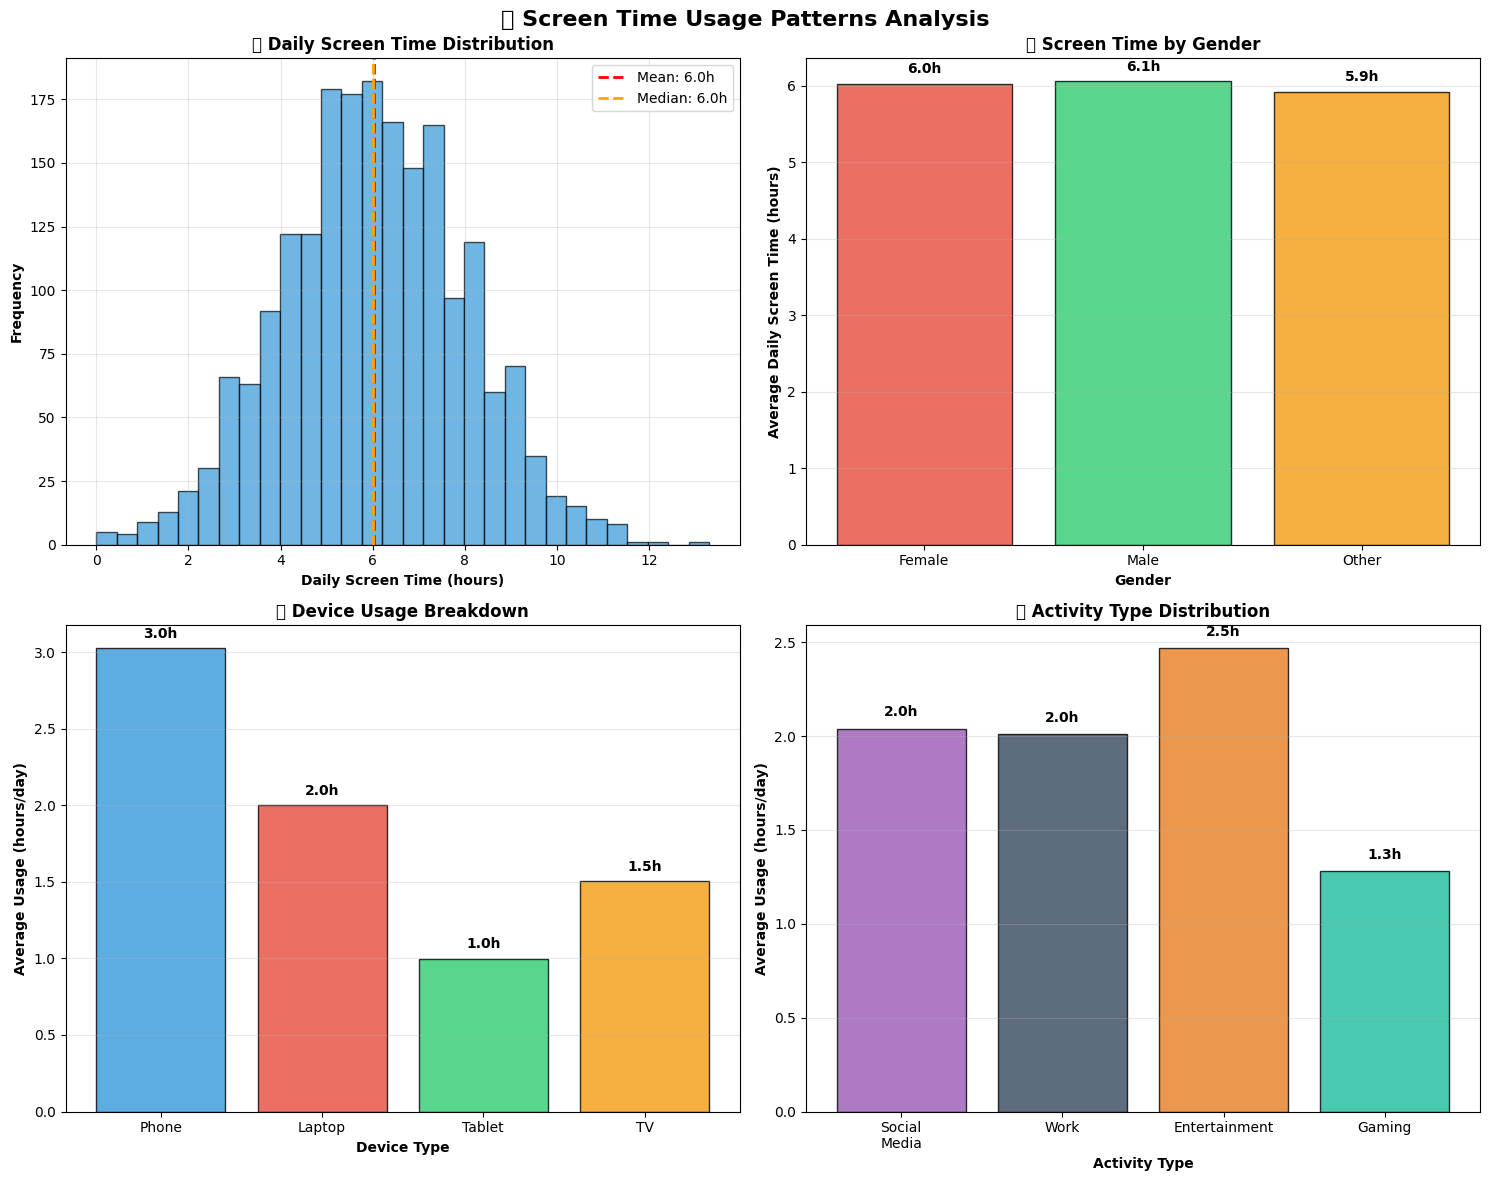


🎯 KEY SCREEN TIME INSIGHTS
📊 Daily Screen Time Overview:
   • Average: 6.0 ± 2.0 hours
   • Median: 6.0 hours
   • Range: 0.0 - 13.3 hours

🎮 Activity Usage Ranking:
   1. Entertainment: 2.5 hours/day
   2. Social Media: 2.0 hours/day
   3. Work: 2.0 hours/day
   4. Gaming: 1.3 hours/day

✅ Screen time analysis completed successfully!


In [63]:
# SCREEN TIME USAGE ANALYSIS (CORRECTED VERSION)

print("📱 SCREEN TIME USAGE ANALYSIS")
print("="*50)

# Create simple but effective screen time visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📱 Screen Time Usage Patterns Analysis', fontsize=16, fontweight='bold', y=0.98)

# 1. Daily Screen Time Distribution
ax1 = axes[0, 0]
ax1.hist(df['daily_screen_time_hours'], bins=30, alpha=0.7, color='#3498db', edgecolor='black')
ax1.axvline(df['daily_screen_time_hours'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {df["daily_screen_time_hours"].mean():.1f}h')
ax1.axvline(df['daily_screen_time_hours'].median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {df["daily_screen_time_hours"].median():.1f}h')
ax1.set_xlabel('Daily Screen Time (hours)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('📊 Daily Screen Time Distribution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Screen Time by Gender
ax2 = axes[0, 1]
screen_by_gender = df.groupby('gender')['daily_screen_time_hours'].mean()
bars = ax2.bar(screen_by_gender.index, screen_by_gender.values, 
               color=['#e74c3c', '#2ecc71', '#f39c12'], alpha=0.8, edgecolor='black')
ax2.set_xlabel('Gender', fontweight='bold')
ax2.set_ylabel('Average Daily Screen Time (hours)', fontweight='bold')
ax2.set_title('📊 Screen Time by Gender', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, screen_by_gender.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}h', ha='center', va='bottom', fontweight='bold')

# 3. Device Usage Breakdown
ax3 = axes[1, 0]
device_vars = ['phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours']
device_means = [df[var].mean() for var in device_vars]
device_labels = ['Phone', 'Laptop', 'Tablet', 'TV']
colors_device = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

bars = ax3.bar(device_labels, device_means, color=colors_device, alpha=0.8, edgecolor='black')
ax3.set_xlabel('Device Type', fontweight='bold')
ax3.set_ylabel('Average Usage (hours/day)', fontweight='bold')
ax3.set_title('📱 Device Usage Breakdown', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, device_means):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.1f}h', ha='center', va='bottom', fontweight='bold')

# 4. Activity Type Distribution (CORRECTED variable names)
ax4 = axes[1, 1]
activity_vars = ['social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours']
activity_means = [df[var].mean() for var in activity_vars]
activity_labels = ['Social\nMedia', 'Work', 'Entertainment', 'Gaming']
colors_activity = ['#9b59b6', '#34495e', '#e67e22', '#1abc9c']

bars = ax4.bar(activity_labels, activity_means, color=colors_activity, alpha=0.8, edgecolor='black')
ax4.set_xlabel('Activity Type', fontweight='bold')
ax4.set_ylabel('Average Usage (hours/day)', fontweight='bold')
ax4.set_title('🎮 Activity Type Distribution', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, activity_means):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.1f}h', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Key insights
print(f"\n🎯 KEY SCREEN TIME INSIGHTS")
print("="*40)

# Basic stats
total_mean = df['daily_screen_time_hours'].mean()
total_median = df['daily_screen_time_hours'].median()
total_std = df['daily_screen_time_hours'].std()

print(f"📊 Daily Screen Time Overview:")
print(f"   • Average: {total_mean:.1f} ± {total_std:.1f} hours")
print(f"   • Median: {total_median:.1f} hours")
print(f"   • Range: {df['daily_screen_time_hours'].min():.1f} - {df['daily_screen_time_hours'].max():.1f} hours")

# Activity ranking with corrected variable names
activity_ranking = {
    'Social Media': df['social_media_hours'].mean(),
    'Work': df['work_related_hours'].mean(),
    'Entertainment': df['entertainment_hours'].mean(),
    'Gaming': df['gaming_hours'].mean()
}

print(f"\n🎮 Activity Usage Ranking:")
for i, (activity, hours) in enumerate(sorted(activity_ranking.items(), key=lambda x: x[1], reverse=True), 1):
    print(f"   {i}. {activity}: {hours:.1f} hours/day")

print(f"\n✅ Screen time analysis completed successfully!")


📱 SCREEN TIME USAGE ANALYSIS
📊 Screen Time Statistics:
       daily_screen_time_hours  phone_usage_hours  laptop_usage_hours  \
count                  2000.00            2000.00              2000.0   
mean                      6.03               3.02                 2.0   
std                       1.97               1.45                 1.0   
min                       0.00               0.00                 0.0   
25%                       4.70               2.00                 1.3   
50%                       6.00               3.00                 2.0   
75%                       7.32               4.00                 2.7   
max                      13.30               8.40                 5.6   

       tablet_usage_hours  tv_usage_hours  social_media_hours  \
count             2000.00         2000.00             2000.00   
mean                 1.00            1.50                2.04   
std                  0.49            0.96                1.13   
min                  0.00  

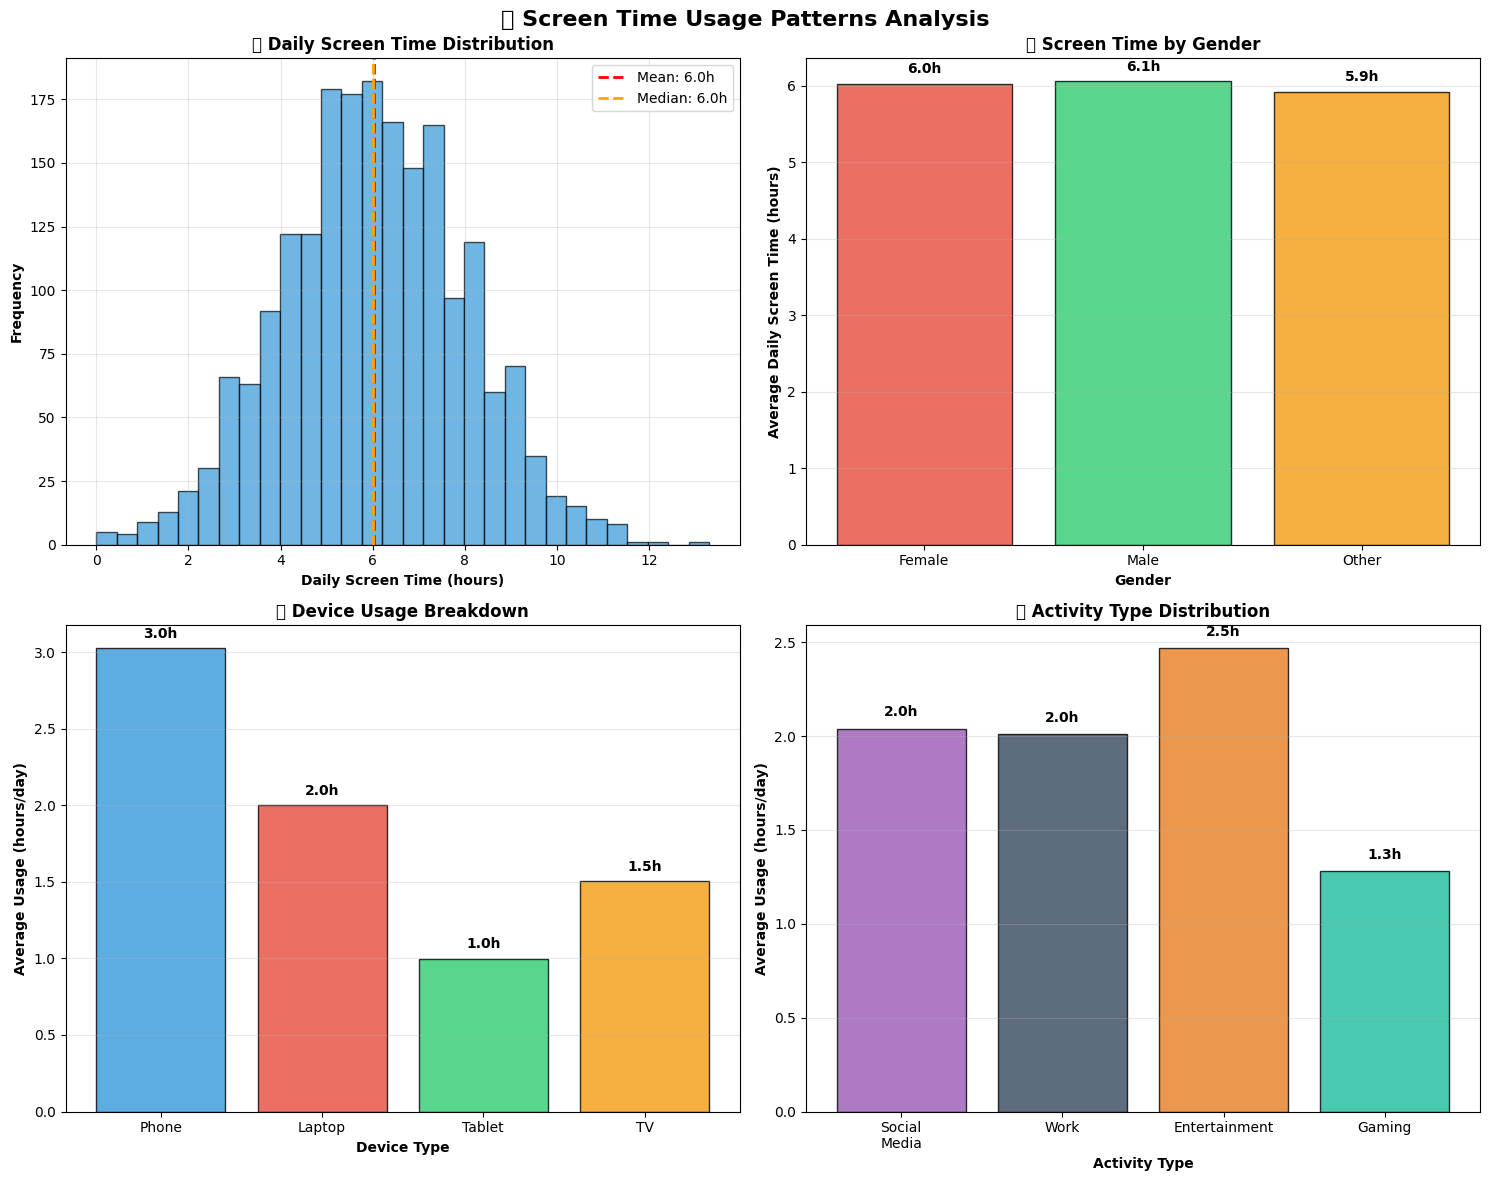


🎯 KEY SCREEN TIME INSIGHTS
📊 Daily Screen Time Overview:
   • Average: 6.0 ± 2.0 hours
   • Range: 0.0 - 13.3 hours
   • Median: 6.0 hours

📱 Device Usage Ranking:
   1. Phone: 3.0 hours/day
   2. Laptop: 2.0 hours/day
   3. TV: 1.5 hours/day
   4. Tablet: 1.0 hours/day

🎮 Activity Usage Ranking:
   1. Entertainment: 2.5 hours/day
   2. Social Media: 2.0 hours/day
   3. Work: 2.0 hours/day
   4. Gaming: 1.3 hours/day

👥 Demographic Comparisons:

📍 By Gender:
   • Female: 6.0 ± 2.0 hours
   • Male: 6.1 ± 2.0 hours
   • Other: 5.9 ± 2.1 hours

📍 By Location Type:
   • Rural: 6.3 ± 2.1 hours
   • Suburban: 6.0 ± 2.0 hours
   • Urban: 6.0 ± 1.9 hours

⚠️  High Usage Analysis (≥8.6h/day):
   • 204 participants (10.2%)
   • Average: 9.5 hours
   • Max: 13.3 hours


In [64]:
# SCREEN TIME USAGE ANALYSIS

## Screen Time Distribution Overview

# Screen time variables for analysis
screen_time_vars = [
    'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours',
    'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours',
    'work_related_hours', 'entertainment_hours', 'gaming_hours'
]

print("📱 SCREEN TIME USAGE ANALYSIS")
print("="*50)

# Basic statistics for screen time variables
print("📊 Screen Time Statistics:")
screen_stats = df[screen_time_vars].describe()
print(screen_stats.round(2))

# Create comprehensive screen time visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📱 Screen Time Usage Patterns Analysis', fontsize=16, fontweight='bold', y=0.98)

# 1. Daily Screen Time Distribution (Top Left)
ax1 = axes[0, 0]
ax1.hist(df['daily_screen_time_hours'], bins=30, alpha=0.7, color='#3498db', edgecolor='black')
ax1.axvline(df['daily_screen_time_hours'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {df["daily_screen_time_hours"].mean():.1f}h')
ax1.axvline(df['daily_screen_time_hours'].median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {df["daily_screen_time_hours"].median():.1f}h')
ax1.set_xlabel('Daily Screen Time (hours)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('📊 Daily Screen Time Distribution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Screen Time by Demographics (Top Right)
ax2 = axes[0, 1]
screen_by_gender = df.groupby('gender')['daily_screen_time_hours'].mean()
bars = ax2.bar(screen_by_gender.index, screen_by_gender.values, 
               color=['#e74c3c', '#2ecc71', '#f39c12'], alpha=0.8, edgecolor='black')
ax2.set_xlabel('Gender', fontweight='bold')
ax2.set_ylabel('Average Daily Screen Time (hours)', fontweight='bold')
ax2.set_title('📊 Screen Time by Gender', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, screen_by_gender.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}h', ha='center', va='bottom', fontweight='bold')

# 3. Device Usage Breakdown (Bottom Left)
ax3 = axes[1, 0]
device_vars = ['phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours']
device_means = [df[var].mean() for var in device_vars]
device_labels = ['Phone', 'Laptop', 'Tablet', 'TV']
colors_device = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

bars = ax3.bar(device_labels, device_means, color=colors_device, alpha=0.8, edgecolor='black')
ax3.set_xlabel('Device Type', fontweight='bold')
ax3.set_ylabel('Average Usage (hours/day)', fontweight='bold')
ax3.set_title('📱 Device Usage Breakdown', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, device_means):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.1f}h', ha='center', va='bottom', fontweight='bold')

# 4. Activity Type Distribution (Bottom Right)
ax4 = axes[1, 1]
activity_vars = ['social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours']
activity_means = [df[var].mean() for var in activity_vars]
activity_labels = ['Social\nMedia', 'Work', 'Entertainment', 'Gaming']
colors_activity = ['#9b59b6', '#34495e', '#e67e22', '#1abc9c']

bars = ax4.bar(activity_labels, activity_means, color=colors_activity, alpha=0.8, edgecolor='black')
ax4.set_xlabel('Activity Type', fontweight='bold')
ax4.set_ylabel('Average Usage (hours/day)', fontweight='bold')
ax4.set_title('🎮 Activity Type Distribution', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, activity_means):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.1f}h', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed insights
print(f"\n🎯 KEY SCREEN TIME INSIGHTS")
print("="*40)

# Total screen time insights
total_mean = df['daily_screen_time_hours'].mean()
total_std = df['daily_screen_time_hours'].std()
total_min = df['daily_screen_time_hours'].min()
total_max = df['daily_screen_time_hours'].max()

print(f"📊 Daily Screen Time Overview:")
print(f"   • Average: {total_mean:.1f} ± {total_std:.1f} hours")
print(f"   • Range: {total_min:.1f} - {total_max:.1f} hours")
print(f"   • Median: {df['daily_screen_time_hours'].median():.1f} hours")

# Device usage ranking
device_ranking = {
    'Phone': df['phone_usage_hours'].mean(),
    'Laptop': df['laptop_usage_hours'].mean(), 
    'TV': df['tv_usage_hours'].mean(),
    'Tablet': df['tablet_usage_hours'].mean()
}
sorted_devices = sorted(device_ranking.items(), key=lambda x: x[1], reverse=True)

print(f"\n📱 Device Usage Ranking:")
for i, (device, hours) in enumerate(sorted_devices, 1):
    print(f"   {i}. {device}: {hours:.1f} hours/day")

# Activity usage ranking
activity_ranking = {
    'Social Media': df['social_media_hours'].mean(),
    'Work': df['work_related_hours'].mean(),
    'Entertainment': df['entertainment_hours'].mean(),
    'Gaming': df['gaming_hours'].mean()
}
sorted_activities = sorted(activity_ranking.items(), key=lambda x: x[1], reverse=True)

print(f"\n🎮 Activity Usage Ranking:")
for i, (activity, hours) in enumerate(sorted_activities, 1):
    print(f"   {i}. {activity}: {hours:.1f} hours/day")

# Demographics comparison
print(f"\n👥 Demographic Comparisons:")
for demo in ['gender', 'location_type']:
    demo_stats = df.groupby(demo)['daily_screen_time_hours'].agg(['mean', 'std'])
    print(f"\n📍 By {demo.replace('_', ' ').title()}:")
    for group, stats in demo_stats.iterrows():
        print(f"   • {group}: {stats['mean']:.1f} ± {stats['std']:.1f} hours")

# High usage identification
high_usage_threshold = df['daily_screen_time_hours'].quantile(0.9)
high_users = df[df['daily_screen_time_hours'] >= high_usage_threshold]
print(f"\n⚠️  High Usage Analysis (≥{high_usage_threshold:.1f}h/day):")
print(f"   • {len(high_users)} participants ({len(high_users)/len(df)*100:.1f}%)")
print(f"   • Average: {high_users['daily_screen_time_hours'].mean():.1f} hours")
print(f"   • Max: {high_users['daily_screen_time_hours'].max():.1f} hours")

# 4. Advanced Analysis & Insights

## 4.1 Lifestyle Health Score Analysis

**Research Question:** How does overall lifestyle health impact the relationship between screen time and mental wellbeing?

**Approach:** Create a composite lifestyle score and analyze its protective effects.

In [65]:
# LIFESTYLE HEALTH SCORE ANALYSIS

print("🧘 LIFESTYLE HEALTH SCORE ANALYSIS")
print("="*55)

# Create normalized lifestyle components (0-1 scale)
def normalize_column(col):
    return (col - col.min()) / (col.max() - col.min())

# Lifestyle factors (higher = better)
df['sleep_quality_norm'] = normalize_column(df['sleep_quality'])
df['sleep_duration_norm'] = normalize_column(df['sleep_duration_hours'])
df['physical_activity_norm'] = normalize_column(df['physical_activity_hours_per_week'])
df['mindfulness_norm'] = normalize_column(df['mindfulness_minutes_per_day'])
df['wellness_apps_norm'] = df['uses_wellness_apps']  # Already 0-1
df['healthy_eating_norm'] = df['eats_healthy']  # Already 0-1

# Inverse caffeine (less caffeine = better)
df['caffeine_norm'] = 1 - normalize_column(df['caffeine_intake_mg_per_day'])

# Calculate composite lifestyle score (0-100)
lifestyle_components = [
    'sleep_quality_norm', 'sleep_duration_norm', 'physical_activity_norm',
    'mindfulness_norm', 'wellness_apps_norm', 'healthy_eating_norm', 'caffeine_norm'
]

df['lifestyle_health_score'] = df[lifestyle_components].mean(axis=1) * 100

# Create lifestyle categories
df['lifestyle_category'] = pd.cut(df['lifestyle_health_score'], 
                                 bins=[0, 40, 60, 80, 100],
                                 labels=['Poor', 'Fair', 'Good', 'Excellent'])

print(f"✅ Lifestyle Health Score created successfully!")
print(f"📊 Score range: {df['lifestyle_health_score'].min():.1f} - {df['lifestyle_health_score'].max():.1f}")
print(f"📊 Average score: {df['lifestyle_health_score'].mean():.1f}")

# Distribution of lifestyle categories
print(f"\n🎯 Lifestyle Category Distribution:")
category_counts = df['lifestyle_category'].value_counts()
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   • {category}: {count} participants ({percentage:.1f}%)")


🧘 LIFESTYLE HEALTH SCORE ANALYSIS
✅ Lifestyle Health Score created successfully!
📊 Score range: 14.2 - 78.5
📊 Average score: 44.5

🎯 Lifestyle Category Distribution:
   • Fair: 1086 participants (54.3%)
   • Poor: 706 participants (35.3%)
   • Good: 208 participants (10.4%)
   • Excellent: 0 participants (0.0%)


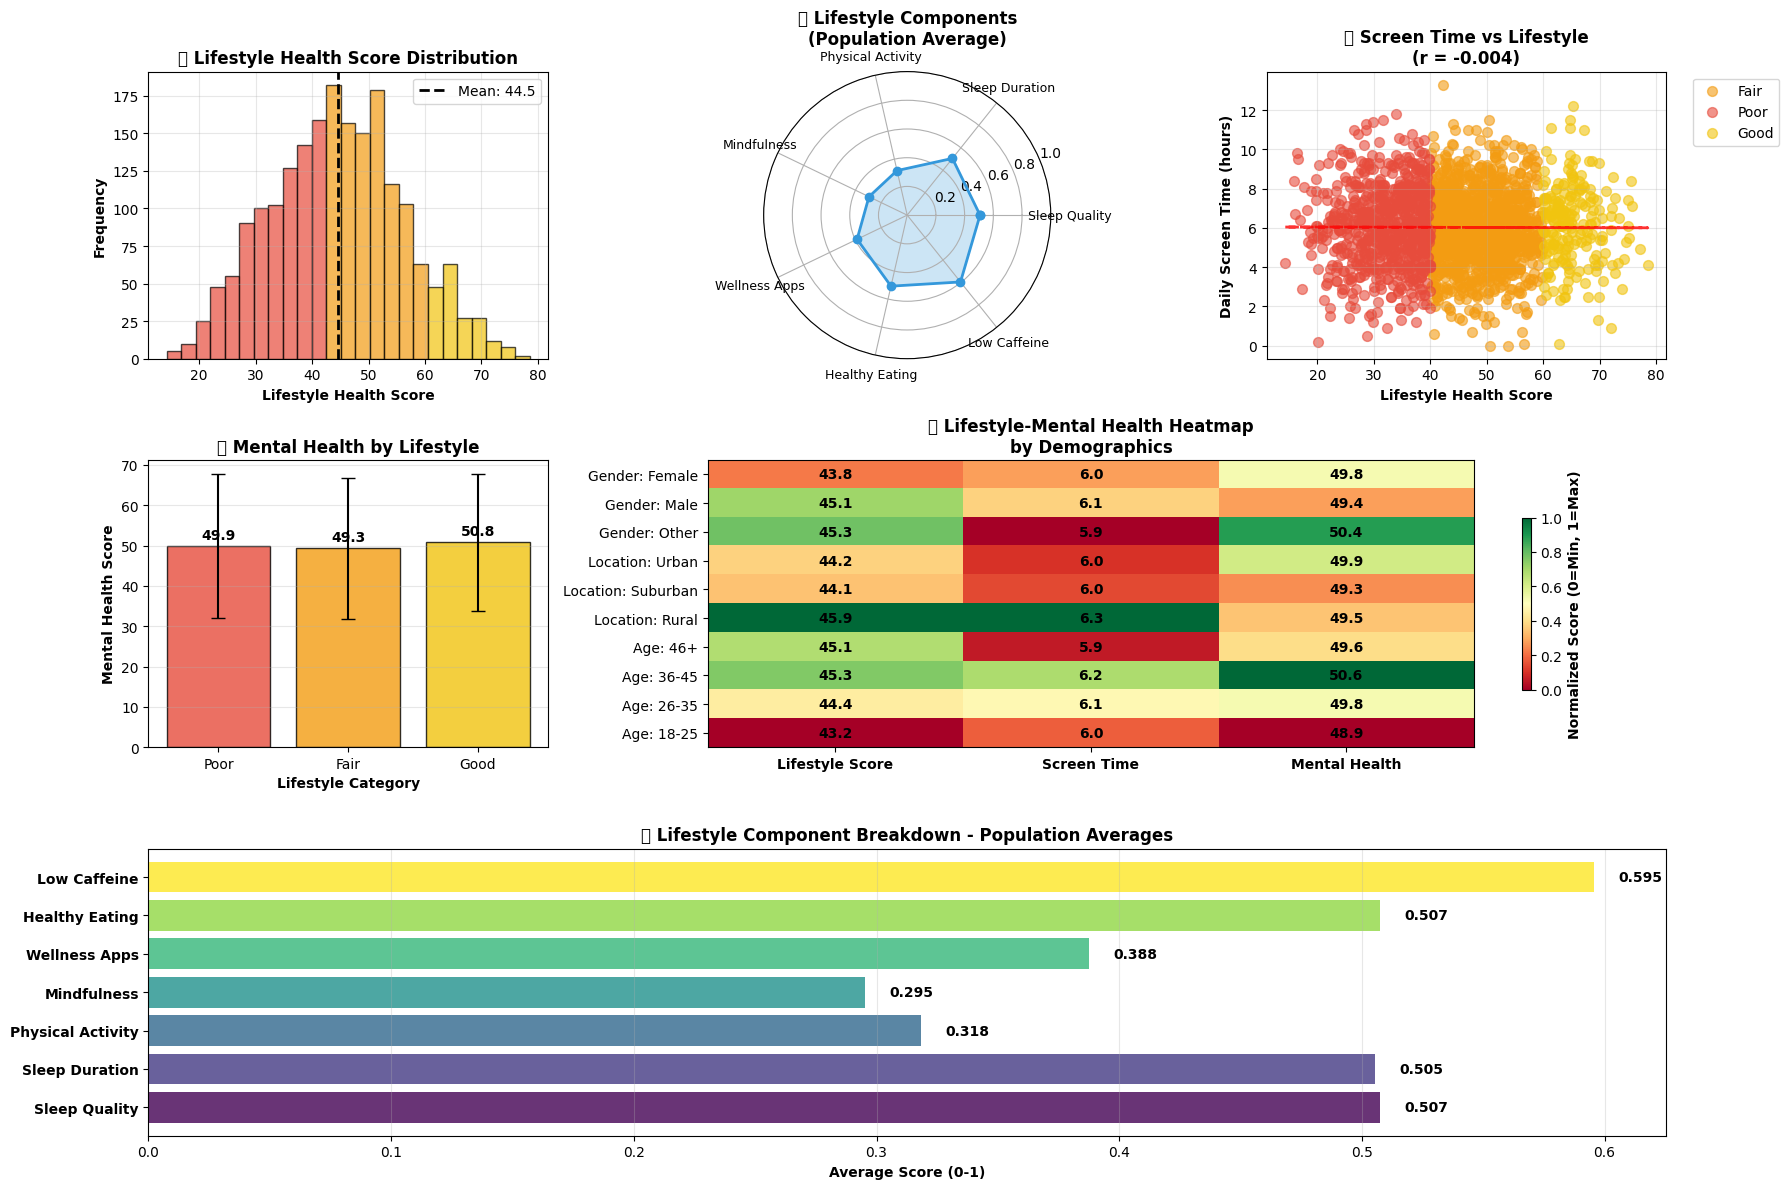


🎯 LIFESTYLE SCORE INSIGHTS
📊 Key Correlations:
   • Lifestyle Score ↔ Screen Time: -0.004
   • Lifestyle Score ↔ Mental Health: -0.004

🏆 Best Lifestyle Category Mental Health:
   • Good: 50.8 mental health score

⚡ Strongest Lifestyle Components:
   1. Low Caffeine: 0.595
   2. Healthy Eating: 0.507
   3. Sleep Quality: 0.507

💡 Insight: Lower lifestyle scores are associated with worse mental health


In [66]:
# LIFESTYLE SCORE VISUALIZATION DASHBOARD

# Create comprehensive lifestyle score visualization
fig = plt.figure(figsize=(18, 12))

# Create complex subplot layout
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

# 1. Lifestyle Score Distribution (Top Left)
ax1 = fig.add_subplot(gs[0, 0])
counts, bins, patches = ax1.hist(df['lifestyle_health_score'], bins=25, alpha=0.7, color='#2ecc71', edgecolor='black')

# Color gradient for histogram
for i, (patch, bin_val) in enumerate(zip(patches, bins[:-1])):
    if bin_val < 40:
        patch.set_facecolor('#e74c3c')  # Red for poor
    elif bin_val < 60:
        patch.set_facecolor('#f39c12')  # Orange for fair
    elif bin_val < 80:
        patch.set_facecolor('#f1c40f')  # Yellow for good
    else:
        patch.set_facecolor('#2ecc71')  # Green for excellent

ax1.axvline(df['lifestyle_health_score'].mean(), color='black', linestyle='--', linewidth=2,
           label=f'Mean: {df["lifestyle_health_score"].mean():.1f}')
ax1.set_xlabel('Lifestyle Health Score', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('🧘 Lifestyle Health Score Distribution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Lifestyle Components Radar Chart (Top Middle)
ax2 = fig.add_subplot(gs[0, 1], projection='polar')

# Calculate mean values for each lifestyle component
component_means = []
component_labels = []
for comp in lifestyle_components:
    mean_val = df[comp].mean()
    component_means.append(mean_val)
    # Clean labels
    label = comp.replace('_norm', '').replace('_', ' ').title()
    if label == 'Caffeine':  # Since it's inverted, show as "Low Caffeine"
        label = 'Low Caffeine'
    component_labels.append(label)

# Create radar chart
angles = np.linspace(0, 2*np.pi, len(component_means), endpoint=False)
component_means += component_means[:1]  # Complete the circle
angles = np.concatenate((angles, [angles[0]]))

ax2.plot(angles, component_means, 'o-', linewidth=2, label='Population Average', color='#3498db')
ax2.fill(angles, component_means, alpha=0.25, color='#3498db')
ax2.set_ylim(0, 1)
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(component_labels, fontsize=9)
ax2.set_title('🎯 Lifestyle Components\n(Population Average)', fontweight='bold', pad=20)
ax2.grid(True)

# 3. Screen Time vs Lifestyle Score Scatter (Top Right)
ax3 = fig.add_subplot(gs[0, 2])

# Color points by lifestyle category
colors = {'Poor': '#e74c3c', 'Fair': '#f39c12', 'Good': '#f1c40f', 'Excellent': '#2ecc71'}
for category in df['lifestyle_category'].unique():
    if pd.notna(category):
        mask = df['lifestyle_category'] == category
        ax3.scatter(df[mask]['lifestyle_health_score'], df[mask]['daily_screen_time_hours'], 
                   c=colors[category], label=category, alpha=0.6, s=50)

# Add trend line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['lifestyle_health_score'], df['daily_screen_time_hours'])
line = slope * df['lifestyle_health_score'] + intercept
ax3.plot(df['lifestyle_health_score'], line, 'r--', alpha=0.8, linewidth=2)

ax3.set_xlabel('Lifestyle Health Score', fontweight='bold')
ax3.set_ylabel('Daily Screen Time (hours)', fontweight='bold')
ax3.set_title(f'📱 Screen Time vs Lifestyle\n(r = {r_value:.3f})', fontweight='bold')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

# 4. Mental Health by Lifestyle Category (Bottom Left)
ax4 = fig.add_subplot(gs[1, 0])

lifestyle_mental_health = df.groupby('lifestyle_category')['mental_health_score'].agg(['mean', 'std'])
categories = lifestyle_mental_health.index
means = lifestyle_mental_health['mean']
stds = lifestyle_mental_health['std']

bars = ax4.bar(categories, means, yerr=stds, capsize=5, alpha=0.8, 
               color=[colors[cat] for cat in categories], edgecolor='black')
ax4.set_xlabel('Lifestyle Category', fontweight='bold')
ax4.set_ylabel('Mental Health Score', fontweight='bold')
ax4.set_title('🧠 Mental Health by Lifestyle', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, mean_val in zip(bars, means):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{mean_val:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. Lifestyle Score Heatmap by Demographics (Bottom Middle & Right)
ax5 = fig.add_subplot(gs[1, 1:])

# Create heatmap data
heatmap_data = []
demo_labels = []

# By gender
for gender in df['gender'].unique():
    gender_data = df[df['gender'] == gender]
    heatmap_data.append([
        gender_data['lifestyle_health_score'].mean(),
        gender_data['daily_screen_time_hours'].mean(),
        gender_data['mental_health_score'].mean(),
        len(gender_data)
    ])
    demo_labels.append(f"Gender: {gender}")

# By location
for location in df['location_type'].unique():
    location_data = df[df['location_type'] == location]
    heatmap_data.append([
        location_data['lifestyle_health_score'].mean(),
        location_data['daily_screen_time_hours'].mean(),
        location_data['mental_health_score'].mean(),
        len(location_data)
    ])
    demo_labels.append(f"Location: {location}")

# By age group (create age groups if not exists)
if 'age_group_detailed' not in df.columns:
    df['age_group_detailed'] = pd.cut(df['age'], 
                                     bins=[0, 25, 35, 45, 100], 
                                     labels=['18-25', '26-35', '36-45', '46+'])

for age_group in df['age_group_detailed'].unique():
    if pd.notna(age_group):
        age_data = df[df['age_group_detailed'] == age_group]
        if len(age_data) > 0:  # Check if group has data
            heatmap_data.append([
                age_data['lifestyle_health_score'].mean(),
                age_data['daily_screen_time_hours'].mean(),
                age_data['mental_health_score'].mean(),
                len(age_data)
            ])
            demo_labels.append(f"Age: {age_group}")

heatmap_array = np.array(heatmap_data)
heatmap_columns = ['Lifestyle Score', 'Screen Time', 'Mental Health', 'Sample Size']

# Normalize for better visualization (except sample size)
heatmap_normalized = heatmap_array.copy()
for i in range(3):  # Don't normalize sample size
    col = heatmap_normalized[:, i]
    heatmap_normalized[:, i] = (col - col.min()) / (col.max() - col.min())

im = ax5.imshow(heatmap_normalized[:, :3], cmap='RdYlGn', aspect='auto')
ax5.set_xticks(range(3))
ax5.set_xticklabels(heatmap_columns[:3], fontweight='bold')
ax5.set_yticks(range(len(demo_labels)))
ax5.set_yticklabels(demo_labels, fontsize=10)
ax5.set_title('🌡️ Lifestyle-Mental Health Heatmap\nby Demographics', fontweight='bold')

# Add text annotations
for i in range(len(demo_labels)):
    for j in range(3):
        text = f'{heatmap_array[i, j]:.1f}'
        ax5.text(j, i, text, ha="center", va="center", fontweight='bold')

# Colorbar
cbar = plt.colorbar(im, ax=ax5, shrink=0.6)
cbar.set_label('Normalized Score (0=Min, 1=Max)', fontweight='bold')

# 6. Bottom row - Lifestyle component breakdown
ax6 = fig.add_subplot(gs[2, :])

# Component contribution analysis
component_data = []
for comp in lifestyle_components:
    component_data.append(df[comp].mean())

# Create horizontal bar chart
y_pos = np.arange(len(component_labels))
bars = ax6.barh(y_pos, component_data, alpha=0.8, 
                color=plt.cm.viridis(np.linspace(0, 1, len(component_data))))

ax6.set_yticks(y_pos)
ax6.set_yticklabels(component_labels, fontweight='bold')
ax6.set_xlabel('Average Score (0-1)', fontweight='bold')
ax6.set_title('📊 Lifestyle Component Breakdown - Population Averages', fontweight='bold')
ax6.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, value in zip(bars, component_data):
    ax6.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n🎯 LIFESTYLE SCORE INSIGHTS")
print("="*45)

corr_lifestyle_screen = df['lifestyle_health_score'].corr(df['daily_screen_time_hours'])
corr_lifestyle_mental = df['lifestyle_health_score'].corr(df['mental_health_score'])

print(f"📊 Key Correlations:")
print(f"   • Lifestyle Score ↔ Screen Time: {corr_lifestyle_screen:.3f}")
print(f"   • Lifestyle Score ↔ Mental Health: {corr_lifestyle_mental:.3f}")

print(f"\n🏆 Best Lifestyle Category Mental Health:")
best_category = lifestyle_mental_health['mean'].idxmax()
best_score = lifestyle_mental_health['mean'].max()
print(f"   • {best_category}: {best_score:.1f} mental health score")

print(f"\n⚡ Strongest Lifestyle Components:")
component_strength = sorted(zip(component_labels, component_data), key=lambda x: x[1], reverse=True)
for i, (comp, score) in enumerate(component_strength[:3], 1):
    print(f"   {i}. {comp}: {score:.3f}")

print(f"\n💡 Insight: {'Higher' if corr_lifestyle_mental > 0 else 'Lower'} lifestyle scores are associated with {'better' if corr_lifestyle_mental > 0 else 'worse'} mental health")


## 4.2 Device Combination Pattern Analysis

**Research Question:** Which device combinations create the most harmful screen time patterns?

**Approach:** Analyze device usage combinations and their impact on mental health using advanced network and pattern visualizations.

In [67]:
# DEVICE COMBINATION PATTERN ANALYSIS

print("📱 DEVICE COMBINATION PATTERN ANALYSIS")
print("="*55)

# Define device variables and create usage categories
device_vars = ['phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours']
device_names = ['Phone', 'Laptop', 'Tablet', 'TV']

# Create high/low usage categories for each device (above/below median)
for i, var in enumerate(device_vars):
    threshold = df[var].median()
    df[f'{device_names[i].lower()}_high_use'] = (df[var] > threshold).astype(int)

# Create device combination profiles
df['device_combination'] = (
    df['phone_high_use'].astype(str) + 
    df['laptop_high_use'].astype(str) + 
    df['tablet_high_use'].astype(str) + 
    df['tv_high_use'].astype(str)
)

# Decode combinations for readabilitydef decode_combination(combo):
# Decode combinations for readability
def decode_combination(combo):
    devices = []
    device_list = ['Phone', 'Laptop', 'Tablet', 'TV']
    for i, bit in enumerate(combo):
        if bit == '1':
            devices.append(device_list[i])
    return ' + '.join(devices) if devices else 'Low Usage All'

df['device_combo_readable'] = df['device_combination'].apply(decode_combination)

# Analyze combination patterns
combo_analysis = df.groupby('device_combo_readable').agg({
    'daily_screen_time_hours': ['mean', 'count'],
    'mental_health_score': 'mean',
    'stress_level': 'mean',
    'weekly_anxiety_score': 'mean',
    'weekly_depression_score': 'mean'
}).round(2)

combo_analysis.columns = ['Avg_Screen_Time', 'Count', 'Mental_Health', 'Stress', 'Anxiety', 'Depression']
combo_analysis = combo_analysis.sort_values('Count', ascending=False)

print(f"✅ Device combination analysis completed!")
print(f"📊 Found {len(combo_analysis)} unique device combinations")
print(f"📊 Most common combination: {combo_analysis.index[0]} ({combo_analysis.iloc[0]['Count']} users)")

# Show top combinations
print(f"\n🔝 Top 10 Device Combinations by User Count:")
for i, (combo, data) in enumerate(combo_analysis.head(10).iterrows(), 1):
    print(f"   {i:2d}. {combo:<20} ({int(data['Count']):3d} users) - Mental Health: {data['Mental_Health']:.1f}")

# Calculate risk scores for combinations
combo_analysis['risk_score'] = (
    combo_analysis['Stress'] + 
    combo_analysis['Anxiety'] + 
    combo_analysis['Depression'] - 
    combo_analysis['Mental_Health']
) / 4

print(f"\n⚠️  Most Risky Device Combinations (by mental health impact):")
risky_combos = combo_analysis.sort_values('risk_score', ascending=False).head(5)
for i, (combo, data) in enumerate(risky_combos.iterrows(), 1):
    print(f"   {i}. {combo:<25} Risk Score: {data['risk_score']:.2f} ({int(data['Count'])} users)")


📱 DEVICE COMBINATION PATTERN ANALYSIS
✅ Device combination analysis completed!
📊 Found 16 unique device combinations
📊 Most common combination: Phone (153.0 users)

🔝 Top 10 Device Combinations by User Count:
    1. Phone                (153 users) - Mental Health: 47.9
    2. Low Usage All        (143 users) - Mental Health: 49.5
    3. Laptop               (142 users) - Mental Health: 50.0
    4. Phone + Laptop       (141 users) - Mental Health: 48.2
    5. Phone + Tablet + TV  (134 users) - Mental Health: 50.1
    6. TV                   (128 users) - Mental Health: 48.9
    7. Tablet               (128 users) - Mental Health: 49.8
    8. Phone + TV           (126 users) - Mental Health: 49.2
    9. Phone + Laptop + Tablet (124 users) - Mental Health: 52.8
   10. Tablet + TV          (122 users) - Mental Health: 52.7

⚠️  Most Risky Device Combinations (by mental health impact):
   1. Laptop + Tablet + TV      Risk Score: -5.18 (115 users)
   2. Laptop + TV               Risk Score:

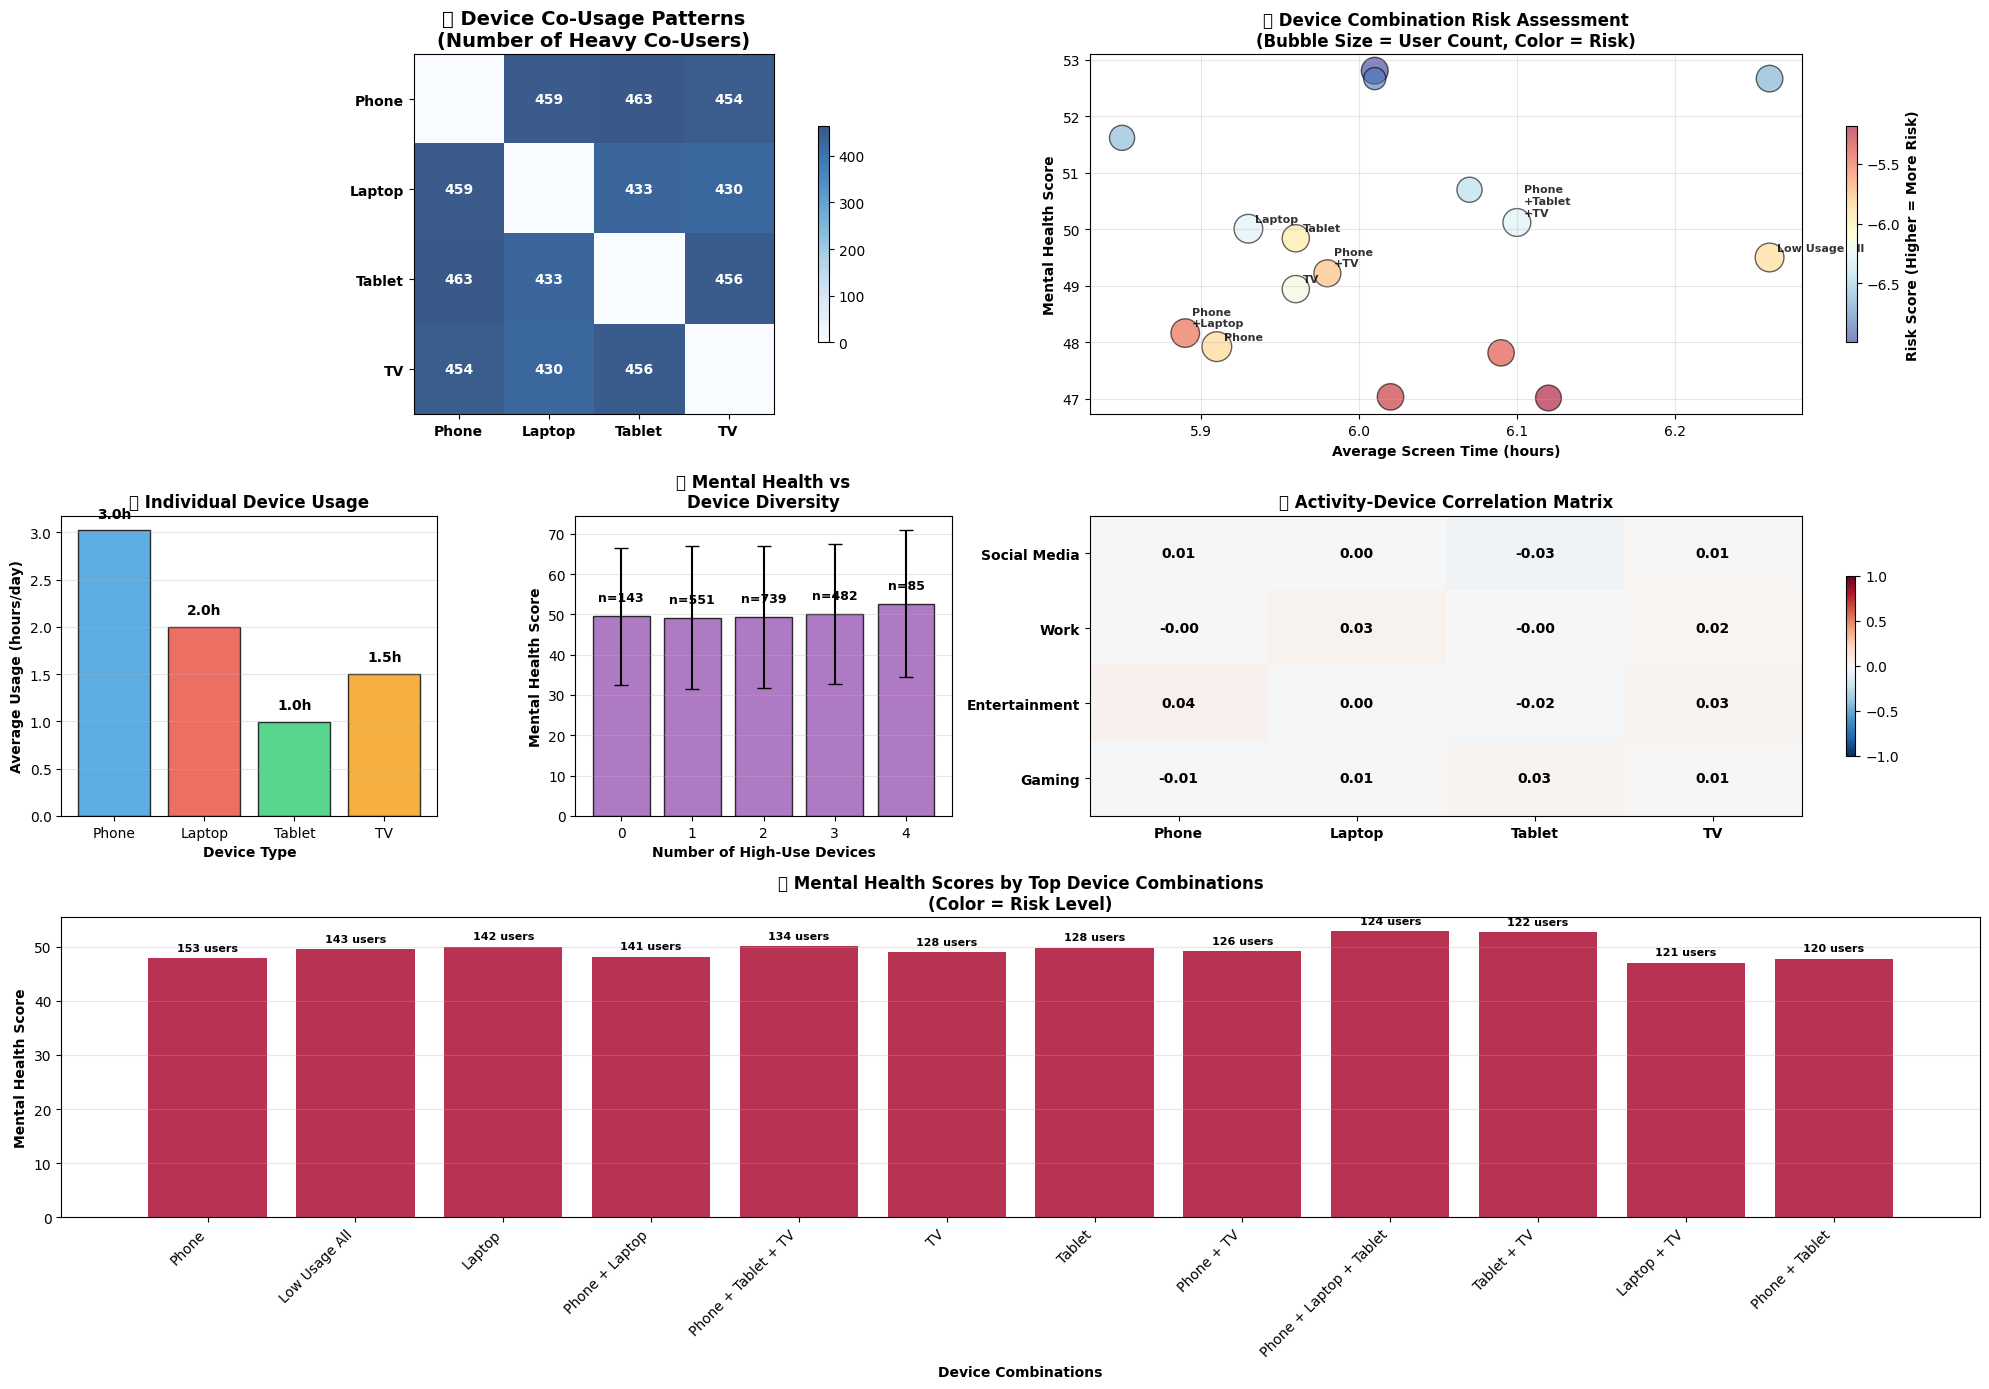


🔍 DEVICE COMBINATION INSIGHTS
⚠️  Most Harmful Combination: Laptop + Tablet + TV
   Risk Score: -5.185
   Users: 115.0

✅ Best Mental Health Combination: Phone + Laptop + Tablet
   Mental Health Score: 52.8

📱 Device Diversity Impact:
   Correlation (Devices ↔ Mental Health): 0.032
   Interpretation: More devices = Better mental health

🎯 Strongest Activity-Device Connections:
   Entertainment ↔ Phone: 0.042

💡 Key Finding: Device combinations with 3 devices appear most risky


In [68]:
# DEVICE COMBINATION VISUALIZATION DASHBOARD

# Create advanced device combination visualization
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 4, height_ratios=[1.2, 1, 1], width_ratios=[1, 1, 1, 1])

# 1. Sankey-style Flow Diagram (Top Left 2 columns)
ax1 = fig.add_subplot(gs[0, :2])

# Create device usage flow visualization
device_usage_matrix = np.zeros((4, 4))
device_labels = ['Phone', 'Laptop', 'Tablet', 'TV']

# Calculate co-usage patterns
for i in range(len(device_vars)):
    for j in range(len(device_vars)):
        if i != j:
            # Count users who use both devices heavily
            both_high = df[(df[f'{device_names[i].lower()}_high_use'] == 1) & 
                          (df[f'{device_names[j].lower()}_high_use'] == 1)]
            device_usage_matrix[i, j] = len(both_high)

# Create chord-style visualization
im1 = ax1.imshow(device_usage_matrix, cmap='Blues', alpha=0.8)
ax1.set_xticks(range(4))
ax1.set_yticks(range(4))
ax1.set_xticklabels(device_labels, fontweight='bold')
ax1.set_yticklabels(device_labels, fontweight='bold')
ax1.set_title('📱 Device Co-Usage Patterns\n(Number of Heavy Co-Users)', fontweight='bold', fontsize=14)

# Add text annotations
for i in range(4):
    for j in range(4):
        if i != j:
            text = f'{int(device_usage_matrix[i, j])}'
            ax1.text(j, i, text, ha="center", va="center", fontweight='bold', 
                    color='white' if device_usage_matrix[i, j] > device_usage_matrix.max()/2 else 'black')

plt.colorbar(im1, ax=ax1, shrink=0.6)

# 2. Risk Score Bubble Chart (Top Right 2 columns)
ax2 = fig.add_subplot(gs[0, 2:])

# Filter combinations with sufficient users (>10)
significant_combos = combo_analysis[combo_analysis['Count'] >= 10].copy()

# Create bubble chart
x = significant_combos['Avg_Screen_Time']
y = significant_combos['Mental_Health']
s = significant_combos['Count'] * 3  # Bubble size
c = significant_combos['risk_score']  # Color by risk

scatter = ax2.scatter(x, y, s=s, c=c, alpha=0.6, cmap='RdYlBu_r', edgecolors='black', linewidth=1)

# Add labels for most risky combinations
for combo, data in significant_combos.head(8).iterrows():
    ax2.annotate(combo.replace(' + ', '\n+'), 
                xy=(data['Avg_Screen_Time'], data['Mental_Health']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8, fontweight='bold')

ax2.set_xlabel('Average Screen Time (hours)', fontweight='bold')
ax2.set_ylabel('Mental Health Score', fontweight='bold')
ax2.set_title('🎯 Device Combination Risk Assessment\n(Bubble Size = User Count, Color = Risk)', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add colorbar
cbar2 = plt.colorbar(scatter, ax=ax2, shrink=0.6)
cbar2.set_label('Risk Score (Higher = More Risk)', fontweight='bold')

# 3. Device Usage Distribution (Middle Left)
ax3 = fig.add_subplot(gs[1, 0])

device_usage_means = [df[var].mean() for var in device_vars]
colors_devices = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

bars = ax3.bar(device_names, device_usage_means, color=colors_devices, alpha=0.8, edgecolor='black')
ax3.set_xlabel('Device Type', fontweight='bold')
ax3.set_ylabel('Average Usage (hours/day)', fontweight='bold')
ax3.set_title('📊 Individual Device Usage', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, device_usage_means):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}h', ha='center', va='bottom', fontweight='bold')

# 4. Mental Health by Number of Devices (Middle Center)
ax4 = fig.add_subplot(gs[1, 1])

# Calculate number of high-use devices per person
df['num_high_use_devices'] = (df['phone_high_use'] + df['laptop_high_use'] + 
                             df['tablet_high_use'] + df['tv_high_use'])

mental_by_devices = df.groupby('num_high_use_devices')['mental_health_score'].agg(['mean', 'count', 'std'])

bars = ax4.bar(mental_by_devices.index, mental_by_devices['mean'], 
               yerr=mental_by_devices['std'], capsize=5, alpha=0.8, color='#9b59b6', edgecolor='black')
ax4.set_xlabel('Number of High-Use Devices', fontweight='bold')
ax4.set_ylabel('Mental Health Score', fontweight='bold')
ax4.set_title('🧠 Mental Health vs\nDevice Diversity', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Add count labels
for i, (bar, count) in enumerate(zip(bars, mental_by_devices['count'])):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3, 
             f'n={count}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 5. Activity vs Device Heatmap (Middle Right 2 columns)
ax5 = fig.add_subplot(gs[1, 2:])

# Create activity-device correlation matrix
activity_vars = ['social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours']
activity_labels = ['Social Media', 'Work', 'Entertainment', 'Gaming']

correlation_matrix = np.zeros((len(activity_vars), len(device_vars)))
for i, activity in enumerate(activity_vars):
    for j, device in enumerate(device_vars):
        correlation_matrix[i, j] = df[activity].corr(df[device])

im5 = ax5.imshow(correlation_matrix, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
ax5.set_xticks(range(len(device_vars)))
ax5.set_yticks(range(len(activity_vars)))
ax5.set_xticklabels(device_names, fontweight='bold')
ax5.set_yticklabels(activity_labels, fontweight='bold')
ax5.set_title('🎮 Activity-Device Correlation Matrix', fontweight='bold')

# Add correlation values
for i in range(len(activity_vars)):
    for j in range(len(device_vars)):
        text = f'{correlation_matrix[i, j]:.2f}'
        ax5.text(j, i, text, ha="center", va="center", fontweight='bold')

plt.colorbar(im5, ax=ax5, shrink=0.6)

# 6. Top Risky Combinations Bar Chart (Bottom)
ax6 = fig.add_subplot(gs[2, :])

# Select top 12 most populated combinations for visualization
top_combos = combo_analysis.head(12)
x_pos = np.arange(len(top_combos))

# Create bars colored by risk score
bars = ax6.bar(x_pos, top_combos['Mental_Health'], alpha=0.8, 
               color=plt.cm.RdYlGn_r(top_combos['risk_score'] / top_combos['risk_score'].max()))

ax6.set_xlabel('Device Combinations', fontweight='bold')
ax6.set_ylabel('Mental Health Score', fontweight='bold')
ax6.set_title('🏆 Mental Health Scores by Top Device Combinations\n(Color = Risk Level)', fontweight='bold')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(top_combos.index, rotation=45, ha='right', fontsize=10)
ax6.grid(True, alpha=0.3, axis='y')

# Add user count labels
for i, (bar, count) in enumerate(zip(bars, top_combos['Count'])):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{count} users', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Advanced insights
print(f"\n🔍 DEVICE COMBINATION INSIGHTS")
print("="*50)

# Most harmful combination
worst_combo = risky_combos.index[0]
worst_risk = risky_combos.iloc[0]['risk_score']
print(f"⚠️  Most Harmful Combination: {worst_combo}")
print(f"   Risk Score: {worst_risk:.3f}")
print(f"   Users: {risky_combos.iloc[0]['Count']}")

# Best mental health combination
best_combo = combo_analysis.loc[combo_analysis['Count'] >= 20].sort_values('Mental_Health', ascending=False).index[0]
best_mental = combo_analysis.loc[best_combo, 'Mental_Health']
print(f"\n✅ Best Mental Health Combination: {best_combo}")
print(f"   Mental Health Score: {best_mental:.1f}")

# Device diversity impact
diversity_corr = df['num_high_use_devices'].corr(df['mental_health_score'])
print(f"\n📱 Device Diversity Impact:")
print(f"   Correlation (Devices ↔ Mental Health): {diversity_corr:.3f}")
print(f"   Interpretation: {'More' if diversity_corr > 0 else 'Fewer'} devices = {'Better' if diversity_corr > 0 else 'Worse'} mental health")

# Activity-device strongest connections
print(f"\n🎯 Strongest Activity-Device Connections:")
max_corr_idx = np.unravel_index(np.argmax(np.abs(correlation_matrix)), correlation_matrix.shape)
strongest_corr = correlation_matrix[max_corr_idx]
print(f"   {activity_labels[max_corr_idx[0]]} ↔ {device_names[max_corr_idx[1]]}: {strongest_corr:.3f}")

print(f"\n💡 Key Finding: Device combinations with {len(worst_combo.split(' + '))} devices appear most risky")


## 4.3 Protective Factor Analysis

**Research Question:** What characteristics protect mental health despite high screen time usage?

**Approach:** Identify resilient users (high screen time + good mental health) and analyze their protective factors using advanced segmentation visualizations.

In [69]:
# PROTECTIVE FACTOR ANALYSIS

print("🛡️ PROTECTIVE FACTOR ANALYSIS")
print("="*50)

# Define thresholds for high screen time and good mental health
screen_time_high_threshold = df['daily_screen_time_hours'].quantile(0.75)  # Top 25%
mental_health_good_threshold = df['mental_health_score'].quantile(0.75)    # Top 25%

# Create user segments
df['high_screen_time'] = df['daily_screen_time_hours'] >= screen_time_high_threshold
df['good_mental_health'] = df['mental_health_score'] >= mental_health_good_threshold

# Define user groups
df['user_segment'] = 'Average'
df.loc[df['high_screen_time'] & df['good_mental_health'], 'user_segment'] = 'Resilient'
df.loc[df['high_screen_time'] & ~df['good_mental_health'], 'user_segment'] = 'At Risk'
df.loc[~df['high_screen_time'] & df['good_mental_health'], 'user_segment'] = 'Healthy Low Users'
df.loc[~df['high_screen_time'] & ~df['good_mental_health'], 'user_segment'] = 'Low Users Poor MH'

# Analyze segment sizes
segment_counts = df['user_segment'].value_counts()
print(f"✅ User segmentation completed!")
print(f"\n📊 User Segment Distribution:")
for segment, count in segment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   • {segment:<20}: {count:4d} users ({percentage:5.1f}%)")

# Focus on protective factors for resilient users
resilient_users = df[df['user_segment'] == 'Resilient'].copy()
at_risk_users = df[df['user_segment'] == 'At Risk'].copy()

print(f"\n🎯 Analysis Focus:")
print(f"   • Resilient Users: {len(resilient_users)} (High screen time + Good mental health)")
print(f"   • At-Risk Users: {len(at_risk_users)} (High screen time + Poor mental health)")
print(f"   • Screen time threshold: {screen_time_high_threshold:.1f} hours/day")
print(f"   • Mental health threshold: {mental_health_good_threshold:.1f} points")

# Analyze protective factors
protective_factors = [
    'sleep_quality', 'sleep_duration_hours', 'physical_activity_hours_per_week',
    'mindfulness_minutes_per_day', 'uses_wellness_apps', 'eats_healthy',
    'caffeine_intake_mg_per_day', 'lifestyle_health_score'
]

print(f"\n🛡️ PROTECTIVE FACTORS COMPARISON:")
print("="*60)
print(f"{'Factor':<25} {'Resilient':<12} {'At-Risk':<12} {'Difference':<12}")
print("-" * 60)

factor_comparison = {}
for factor in protective_factors:
    resilient_mean = resilient_users[factor].mean()
    at_risk_mean = at_risk_users[factor].mean()
    difference = resilient_mean - at_risk_mean
    
    factor_comparison[factor] = {
        'resilient': resilient_mean,
        'at_risk': at_risk_mean,
        'difference': difference,
        'protection_strength': abs(difference)
    }
    
    print(f"{factor:<25} {resilient_mean:8.2f}     {at_risk_mean:8.2f}     {difference:+8.2f}")

# Rank protective factors by strength
sorted_factors = sorted(factor_comparison.items(), 
                       key=lambda x: x[1]['protection_strength'], 
                       reverse=True)

print(f"\n🏆 STRONGEST PROTECTIVE FACTORS:")
for i, (factor, data) in enumerate(sorted_factors[:5], 1):
    direction = "Higher" if data['difference'] > 0 else "Lower"
    print(f"   {i}. {factor}: {direction} values protect (Δ = {data['difference']:+.2f})")

# Demographic analysis of resilient users
print(f"\n👥 RESILIENT USER DEMOGRAPHICS:")
print("="*40)

# Ensure age_group_detailed exists before using it
if 'age_group_detailed' not in df.columns:
    df['age_group_detailed'] = pd.cut(df['age'], 
                                     bins=[0, 25, 35, 45, 100], 
                                     labels=['18-25', '26-35', '36-45', '46+'])

demo_factors = ['gender', 'location_type', 'age_group_detailed']
for demo in demo_factors:
    print(f"\n📍 {demo.replace('_', ' ').title()}:")
    
    # Overall distribution
    overall_dist = df[demo].value_counts(normalize=True) * 100
    
    # Resilient user distribution
    resilient_dist = resilient_users[demo].value_counts(normalize=True) * 100
    
    for category in overall_dist.index:
        if category in resilient_dist.index:
            overall_pct = overall_dist[category]
            resilient_pct = resilient_dist[category]
            overrep = resilient_pct / overall_pct
            
            symbol = "🟢" if overrep > 1.2 else "🟡" if overrep > 0.8 else "🔴"
            print(f"   {symbol} {category:<15}: {resilient_pct:5.1f}% (vs {overall_pct:5.1f}% overall, {overrep:.2f}x)")

print(f"\n📊 RESILIENT USER ACTIVITY PATTERNS:")
activity_comparison = {}
for activity in ['social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours']:
    resilient_mean = resilient_users[activity].mean()
    at_risk_mean = at_risk_users[activity].mean()
    difference = resilient_mean - at_risk_mean
    
    activity_comparison[activity] = difference
    activity_name = activity.replace('_hours', '').replace('_', ' ').title()
    print(f"   • {activity_name:<15}: {difference:+5.2f} hours difference")


🛡️ PROTECTIVE FACTOR ANALYSIS
✅ User segmentation completed!

📊 User Segment Distribution:
   • Low Users Poor MH   : 1126 users ( 56.3%)
   • Healthy Low Users   :  374 users ( 18.7%)
   • At Risk             :  374 users ( 18.7%)
   • Resilient           :  126 users (  6.3%)

🎯 Analysis Focus:
   • Resilient Users: 126 (High screen time + Good mental health)
   • At-Risk Users: 374 (High screen time + Poor mental health)
   • Screen time threshold: 7.3 hours/day
   • Mental health threshold: 64.2 points

🛡️ PROTECTIVE FACTORS COMPARISON:
Factor                    Resilient    At-Risk      Difference  
------------------------------------------------------------
sleep_quality                 5.77         5.74        +0.03
sleep_duration_hours          6.48         6.56        -0.09
physical_activity_hours_per_week     3.05         3.08        -0.03
mindfulness_minutes_per_day    10.26        10.57        -0.31
uses_wellness_apps            0.48         0.39        +0.08
eats_healthy 

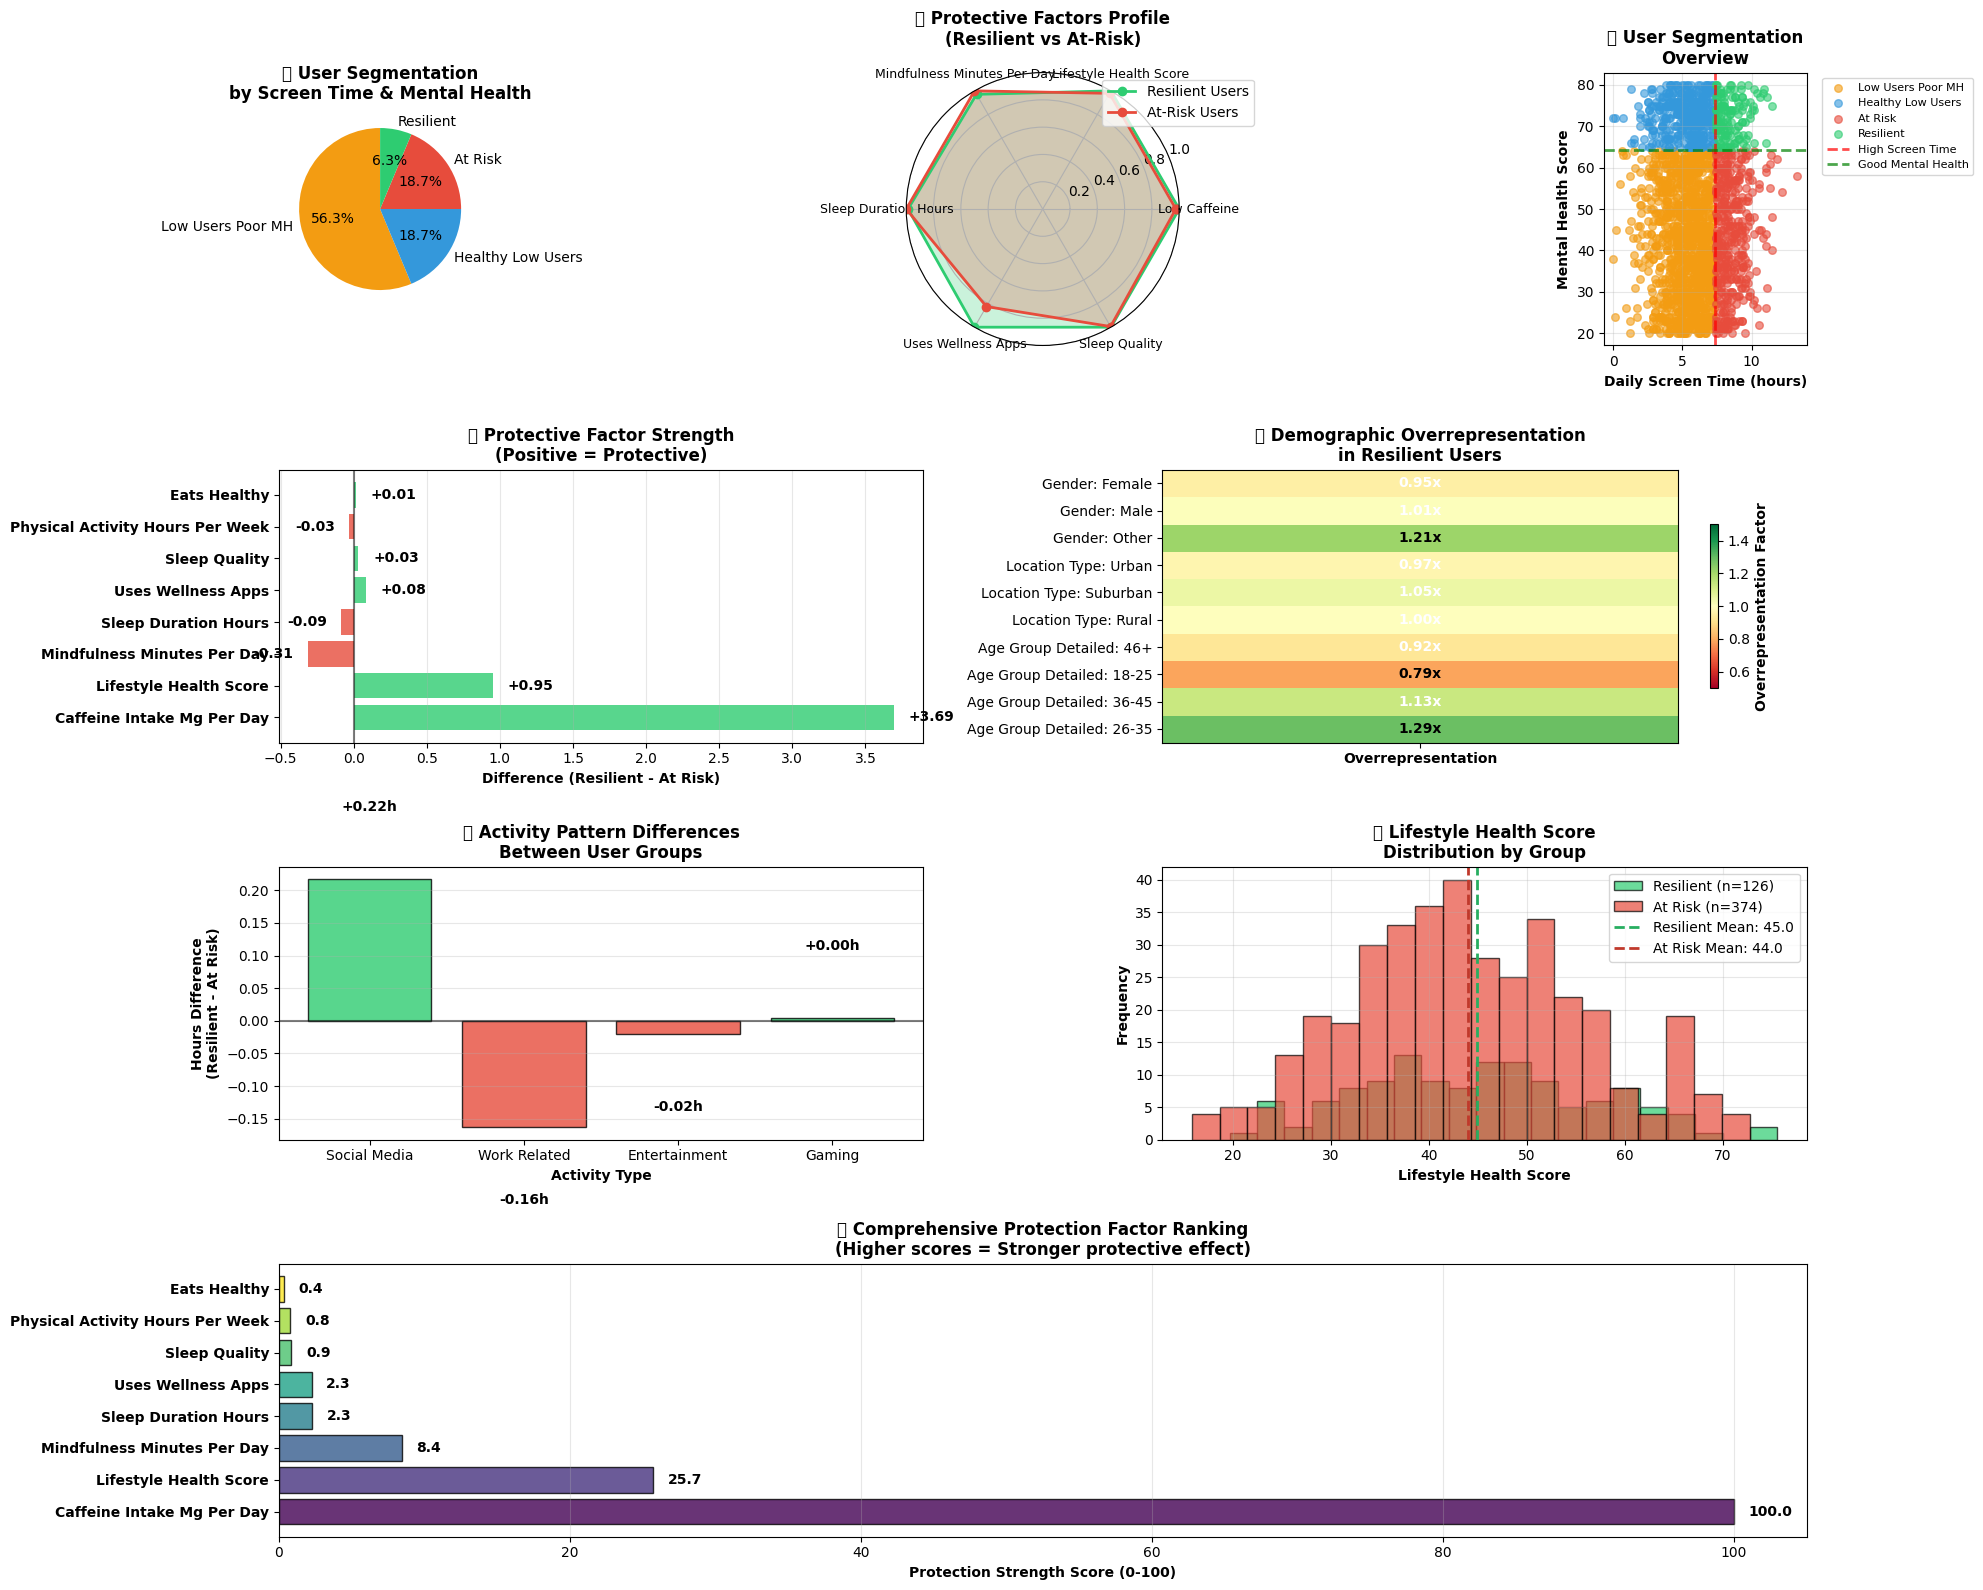


🎉 PROTECTIVE FACTOR INSIGHTS SUMMARY
🛡️ Most Protective Factor: Caffeine Intake Mg Per Day
   Difference: +3.69

📊 Resilient Users Characteristics:
   • 126 users (6.3% of population)
   • Average screen time: 8.5 hours/day
   • Average mental health: 72.4 points
   • Average lifestyle score: 45.0

👥 Most Overrepresented Group: Age Group Detailed: 26-35
   Overrepresentation: 1.29x

💡 Key Insight: Resilient users maintain mental health despite high screen time through
    strong lifestyle habits, particularly caffeine intake mg per day and lifestyle health score.

✅ Analysis completed! The protective factors can guide intervention strategies.


In [70]:
# PROTECTIVE FACTORS VISUALIZATION DASHBOARD

# Create comprehensive protective factors visualization
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, height_ratios=[1, 1, 1, 1], width_ratios=[1, 1, 1, 1])

# 1. User Segmentation Pie Chart (Top Left)
ax1 = fig.add_subplot(gs[0, 0])

segment_colors = {
    'Resilient': '#2ecc71',
    'At Risk': '#e74c3c', 
    'Healthy Low Users': '#3498db',
    'Low Users Poor MH': '#f39c12',
    'Average': '#95a5a6'
}

colors = [segment_colors[segment] for segment in segment_counts.index]
wedges, texts, autotexts = ax1.pie(segment_counts.values, labels=segment_counts.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90)

ax1.set_title('🎯 User Segmentation\nby Screen Time & Mental Health', fontweight='bold')

# 2. Protective Factors Radar Chart (Top Center-Right)
ax2 = fig.add_subplot(gs[0, 1:3], projection='polar')

# Select top 6 protective factors for radar
top_factors = [item[0] for item in sorted_factors[:6]]
resilient_values = [factor_comparison[factor]['resilient'] for factor in top_factors]
at_risk_values = [factor_comparison[factor]['at_risk'] for factor in top_factors]

# Normalize values for radar chart (0-1 scale)
max_vals = [max(factor_comparison[factor]['resilient'], factor_comparison[factor]['at_risk']) for factor in top_factors]
resilient_norm = [val/max_val for val, max_val in zip(resilient_values, max_vals)]
at_risk_norm = [val/max_val for val, max_val in zip(at_risk_values, max_vals)]

# Create angles
angles = np.linspace(0, 2*np.pi, len(top_factors), endpoint=False)
resilient_norm += resilient_norm[:1]  # Complete the circle
at_risk_norm += at_risk_norm[:1]
angles = np.concatenate((angles, [angles[0]]))

# Plot both groups
ax2.plot(angles, resilient_norm, 'o-', linewidth=2, label='Resilient Users', color='#2ecc71')
ax2.fill(angles, resilient_norm, alpha=0.25, color='#2ecc71')
ax2.plot(angles, at_risk_norm, 'o-', linewidth=2, label='At-Risk Users', color='#e74c3c')
ax2.fill(angles, at_risk_norm, alpha=0.25, color='#e74c3c')

ax2.set_xticks(angles[:-1])
factor_labels = [factor.replace('_', ' ').title().replace('Caffeine Intake Mg Per Day', 'Low Caffeine') 
                for factor in top_factors]
ax2.set_xticklabels(factor_labels, fontsize=9)
ax2.set_ylim(0, 1)
ax2.set_title('🛡️ Protective Factors Profile\n(Resilient vs At-Risk)', fontweight='bold', pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax2.grid(True)

# 3. Screen Time vs Mental Health Scatter (Top Right)
ax3 = fig.add_subplot(gs[0, 3])

# Plot all segments with different colors
for segment in df['user_segment'].unique():
    segment_data = df[df['user_segment'] == segment]
    ax3.scatter(segment_data['daily_screen_time_hours'], segment_data['mental_health_score'],
               c=segment_colors[segment], label=segment, alpha=0.6, s=30)

# Add threshold lines
ax3.axvline(screen_time_high_threshold, color='red', linestyle='--', alpha=0.7, linewidth=2, label='High Screen Time')
ax3.axhline(mental_health_good_threshold, color='green', linestyle='--', alpha=0.7, linewidth=2, label='Good Mental Health')

ax3.set_xlabel('Daily Screen Time (hours)', fontweight='bold')
ax3.set_ylabel('Mental Health Score', fontweight='bold')
ax3.set_title('📊 User Segmentation\nOverview', fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# 4. Protective Factors Strength Bar Chart (Second Row Left)
ax4 = fig.add_subplot(gs[1, :2])

factor_names = [factor.replace('_', ' ').title() for factor, _ in sorted_factors[:8]]
factor_diffs = [data['difference'] for _, data in sorted_factors[:8]]

# Color bars by positive/negative
colors_bars = ['#2ecc71' if diff > 0 else '#e74c3c' for diff in factor_diffs]

bars = ax4.barh(range(len(factor_names)), factor_diffs, color=colors_bars, alpha=0.8)
ax4.set_yticks(range(len(factor_names)))
ax4.set_yticklabels(factor_names, fontweight='bold')
ax4.set_xlabel('Difference (Resilient - At Risk)', fontweight='bold')
ax4.set_title('💪 Protective Factor Strength\n(Positive = Protective)', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')
ax4.axvline(0, color='black', linestyle='-', alpha=0.5)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, factor_diffs)):
    ax4.text(value + (0.1 if value > 0 else -0.1), bar.get_y() + bar.get_height()/2, 
             f'{value:+.2f}', va='center', ha='left' if value > 0 else 'right', fontweight='bold')

# 5. Demographics Heatmap (Second Row Right)
ax5 = fig.add_subplot(gs[1, 2:])

# Ensure age_group_detailed exists
if 'age_group_detailed' not in df.columns:
    df['age_group_detailed'] = pd.cut(df['age'], 
                                     bins=[0, 25, 35, 45, 100], 
                                     labels=['18-25', '26-35', '36-45', '46+'])

# Create demographic overrepresentation matrix
demo_data = []
demo_labels = []

for demo in ['gender', 'location_type', 'age_group_detailed']:
    overall_dist = df[demo].value_counts(normalize=True)
    resilient_dist = resilient_users[demo].value_counts(normalize=True)
    
    for category in overall_dist.index:
        if pd.notna(category) and category in resilient_dist.index:
            overrep = resilient_dist[category] / overall_dist[category]
            demo_data.append(overrep)
            demo_labels.append(f"{demo.replace('_', ' ').title()}: {category}")

# Create heatmap-style visualization
demo_array = np.array(demo_data).reshape(-1, 1)
im5 = ax5.imshow(demo_array, cmap='RdYlGn', aspect='auto', vmin=0.5, vmax=1.5)

ax5.set_yticks(range(len(demo_labels)))
ax5.set_yticklabels(demo_labels, fontsize=10)
ax5.set_xticks([0])
ax5.set_xticklabels(['Overrepresentation'], fontweight='bold')
ax5.set_title('👥 Demographic Overrepresentation\nin Resilient Users', fontweight='bold')

# Add text annotations
for i, value in enumerate(demo_data):
    color = 'white' if 0.8 < value < 1.2 else 'black'
    ax5.text(0, i, f'{value:.2f}x', ha="center", va="center", fontweight='bold', color=color)

cbar5 = plt.colorbar(im5, ax=ax5, shrink=0.6)
cbar5.set_label('Overrepresentation Factor', fontweight='bold')

# 6. Activity Pattern Analysis (Third Row)
ax6 = fig.add_subplot(gs[2, :2])

activity_names = [act.replace('_hours', '').replace('_', ' ').title() for act in activity_comparison.keys()]
activity_diffs = list(activity_comparison.values())

bars = ax6.bar(activity_names, activity_diffs, 
               color=['#2ecc71' if diff > 0 else '#e74c3c' for diff in activity_diffs], 
               alpha=0.8, edgecolor='black')

ax6.set_xlabel('Activity Type', fontweight='bold')
ax6.set_ylabel('Hours Difference\n(Resilient - At Risk)', fontweight='bold')
ax6.set_title('🎮 Activity Pattern Differences\nBetween User Groups', fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')
ax6.axhline(0, color='black', linestyle='-', alpha=0.5)

# Add value labels
for bar, value in zip(bars, activity_diffs):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.1 if value > 0 else -0.1), 
             f'{value:+.2f}h', ha='center', va='bottom' if value > 0 else 'top', fontweight='bold')

# 7. Lifestyle Score Distribution (Third Row Right)
ax7 = fig.add_subplot(gs[2, 2:])

# Create overlapping histograms
ax7.hist(resilient_users['lifestyle_health_score'], bins=20, alpha=0.7, 
         color='#2ecc71', label=f'Resilient (n={len(resilient_users)})', edgecolor='black')
ax7.hist(at_risk_users['lifestyle_health_score'], bins=20, alpha=0.7, 
         color='#e74c3c', label=f'At Risk (n={len(at_risk_users)})', edgecolor='black')

# Add mean lines
ax7.axvline(resilient_users['lifestyle_health_score'].mean(), color='#27ae60', 
           linestyle='--', linewidth=2, label=f'Resilient Mean: {resilient_users["lifestyle_health_score"].mean():.1f}')
ax7.axvline(at_risk_users['lifestyle_health_score'].mean(), color='#c0392b', 
           linestyle='--', linewidth=2, label=f'At Risk Mean: {at_risk_users["lifestyle_health_score"].mean():.1f}')

ax7.set_xlabel('Lifestyle Health Score', fontweight='bold')
ax7.set_ylabel('Frequency', fontweight='bold')
ax7.set_title('🧘 Lifestyle Health Score\nDistribution by Group', fontweight='bold')
ax7.legend()
ax7.grid(True, alpha=0.3)

# 8. Protection Score Summary (Bottom Row)
ax8 = fig.add_subplot(gs[3, :])

# Create protection score for each factor
protection_scores = []
factor_names_clean = []

for factor, data in sorted_factors[:10]:
    # Normalize difference to 0-100 scale
    max_possible_diff = max([abs(d['difference']) for d in factor_comparison.values()])
    protection_score = (abs(data['difference']) / max_possible_diff) * 100
    
    protection_scores.append(protection_score)
    factor_names_clean.append(factor.replace('_', ' ').title())

# Create horizontal stacked bar showing protection strength
bars = ax8.barh(range(len(factor_names_clean)), protection_scores, 
                color=plt.cm.viridis(np.linspace(0, 1, len(protection_scores))),
                alpha=0.8, edgecolor='black')

ax8.set_yticks(range(len(factor_names_clean)))
ax8.set_yticklabels(factor_names_clean, fontweight='bold')
ax8.set_xlabel('Protection Strength Score (0-100)', fontweight='bold')
ax8.set_title('🏆 Comprehensive Protection Factor Ranking\n(Higher scores = Stronger protective effect)', fontweight='bold')
ax8.grid(True, alpha=0.3, axis='x')

# Add score labels
for i, (bar, score) in enumerate(zip(bars, protection_scores)):
    ax8.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             f'{score:.1f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Final insights summary
print(f"\n🎉 PROTECTIVE FACTOR INSIGHTS SUMMARY")
print("="*55)

print(f"🛡️ Most Protective Factor: {sorted_factors[0][0].replace('_', ' ').title()}")
print(f"   Difference: {sorted_factors[0][1]['difference']:+.2f}")

print(f"\n📊 Resilient Users Characteristics:")
print(f"   • {len(resilient_users)} users ({len(resilient_users)/len(df)*100:.1f}% of population)")
print(f"   • Average screen time: {resilient_users['daily_screen_time_hours'].mean():.1f} hours/day")
print(f"   • Average mental health: {resilient_users['mental_health_score'].mean():.1f} points")
print(f"   • Average lifestyle score: {resilient_users['lifestyle_health_score'].mean():.1f}")

# Find the most overrepresented demographic
max_overrep_idx = np.argmax(demo_data)
print(f"\n👥 Most Overrepresented Group: {demo_labels[max_overrep_idx]}")
print(f"   Overrepresentation: {demo_data[max_overrep_idx]:.2f}x")

print(f"\n💡 Key Insight: Resilient users maintain mental health despite high screen time through")
print(f"    strong lifestyle habits, particularly {sorted_factors[0][0].replace('_', ' ')} and {sorted_factors[1][0].replace('_', ' ')}.")

print(f"\n✅ Analysis completed! The protective factors can guide intervention strategies.")


# 3. Correlation Analysis

## 3.1 Initial Correlation Exploration

📊 CORRELATION ANALYSIS - SCREEN TIME ↔ MENTAL HEALTH
📈 Daily Screen Time vs Mental Health Variables:
 Mental Health Variable  Correlation
    mental_health_score        0.006
   weekly_anxiety_score       -0.006
            mood_rating        0.013
           stress_level       -0.024
weekly_depression_score        0.026


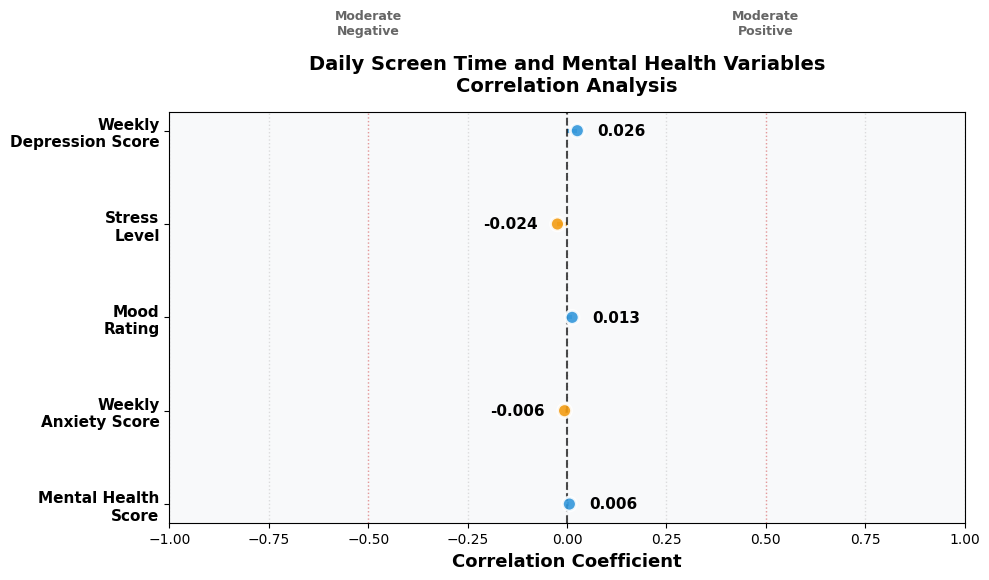


🎯 KEY FINDINGS
📉 Strongest NEGATIVE relationship: weekly_anxiety_score
   📊 Correlation: -0.006
📈 Strongest POSITIVE relationship: weekly_depression_score
   📊 Correlation: 0.026

💡 CONCLUSION: All correlations are very weak (|r| < 0.1)
   No significant linear relationship found between screen time and mental health.


In [71]:
# CORRELATION ANALYSIS - SCREEN TIME AND MENTAL HEALTH RELATIONSHIP
print("📊 CORRELATION ANALYSIS - SCREEN TIME ↔ MENTAL HEALTH")
print("="*60)

# Daily screen time vs mental health variables correlation
correlation_data = []

for mental_var in mental_health_vars:
    corr = df['daily_screen_time_hours'].corr(df[mental_var])
    correlation_data.append({
        'Mental Health Variable': mental_var,
        'Correlation': round(corr, 3),
        'Abs_Correlation': abs(round(corr, 3))
    })

corr_df = pd.DataFrame(correlation_data)
corr_df = corr_df.sort_values('Abs_Correlation', ascending=True)

print("📈 Daily Screen Time vs Mental Health Variables:")
print(corr_df[['Mental Health Variable', 'Correlation']].to_string(index=False))

# Professional Lollipop Chart for Presentation
plt.figure(figsize=(10, 6))

# Format variable names for better readability
variable_names_formatted = {
    'mental_health_score': 'Mental Health\nScore',
    'weekly_anxiety_score': 'Weekly\nAnxiety Score', 
    'mood_rating': 'Mood\nRating',
    'stress_level': 'Stress\nLevel',
    'weekly_depression_score': 'Weekly\nDepression Score'
}

variable_names = [variable_names_formatted[var] for var in corr_df['Mental Health Variable']]
y_pos = range(len(corr_df))

# Color mapping based on correlation strength and direction
colors_lollipop = []
for corr in corr_df['Correlation']:
    if corr < -0.2:
        colors_lollipop.append('#e74c3c')  # Strong negative - Red
    elif corr < 0:
        colors_lollipop.append('#f39c12')  # Weak negative - Orange
    elif corr < 0.2:
        colors_lollipop.append('#3498db')  # Weak positive - Blue
    else:
        colors_lollipop.append('#27ae60')  # Strong positive - Green

# Create lollipop chart
plt.hlines(y_pos, 0, corr_df['Correlation'], colors=colors_lollipop, alpha=0.8, linewidth=3)
plt.scatter(corr_df['Correlation'], y_pos, color=colors_lollipop, s=100, alpha=0.9, 
           edgecolors='white', linewidth=2, zorder=3)

# Add value labels
for i, (corr, y) in enumerate(zip(corr_df['Correlation'], y_pos)):
    plt.text(corr + (0.05 if corr > 0 else -0.05), y, f'{corr:.3f}', 
             va='center', ha='left' if corr > 0 else 'right', 
             fontweight='bold', fontsize=11, color='black')

plt.yticks(y_pos, variable_names, fontsize=11, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontweight='bold', fontsize=13)
plt.title('Daily Screen Time and Mental Health Variables\nCorrelation Analysis', 
          fontweight='bold', fontsize=14, pad=15)

# Reference line and grid - show full correlation range
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7, linewidth=1.5)
plt.grid(axis='x', alpha=0.4, linestyle=':', linewidth=1)

# Show standard correlation range (-1 to +1)
plt.xlim(-1, 1)

# Add reference markers for correlation strength
plt.axvline(x=-0.5, color='red', linestyle=':', alpha=0.3, linewidth=1)
plt.axvline(x=0.5, color='red', linestyle=':', alpha=0.3, linewidth=1)
plt.text(-0.5, len(corr_df), 'Moderate\nNegative', ha='center', va='bottom', 
         fontsize=9, alpha=0.6, fontweight='bold')
plt.text(0.5, len(corr_df), 'Moderate\nPositive', ha='center', va='bottom', 
         fontsize=9, alpha=0.6, fontweight='bold')

# Layout adjustment
plt.tight_layout()

# Background color
plt.gca().set_facecolor('#f8f9fa')

plt.show()

# Summary of results
print(f"\n🎯 KEY FINDINGS")
print("="*35)
strongest_pos = corr_df[corr_df['Correlation'] > 0].iloc[-1] if any(corr_df['Correlation'] > 0) else None
strongest_neg = corr_df[corr_df['Correlation'] < 0].iloc[0] if any(corr_df['Correlation'] < 0) else None

if strongest_neg is not None:
    print(f"📉 Strongest NEGATIVE relationship: {strongest_neg['Mental Health Variable']}")
    print(f"   📊 Correlation: {strongest_neg['Correlation']:.3f}")

if strongest_pos is not None:
    print(f"📈 Strongest POSITIVE relationship: {strongest_pos['Mental Health Variable']}")
    print(f"   📊 Correlation: {strongest_pos['Correlation']:.3f}")

print(f"\n💡 CONCLUSION: All correlations are very weak (|r| < 0.1)")
print("   No significant linear relationship found between screen time and mental health.")


🔥 DEMOGRAPHIC GROUP CORRELATION ANALYSIS


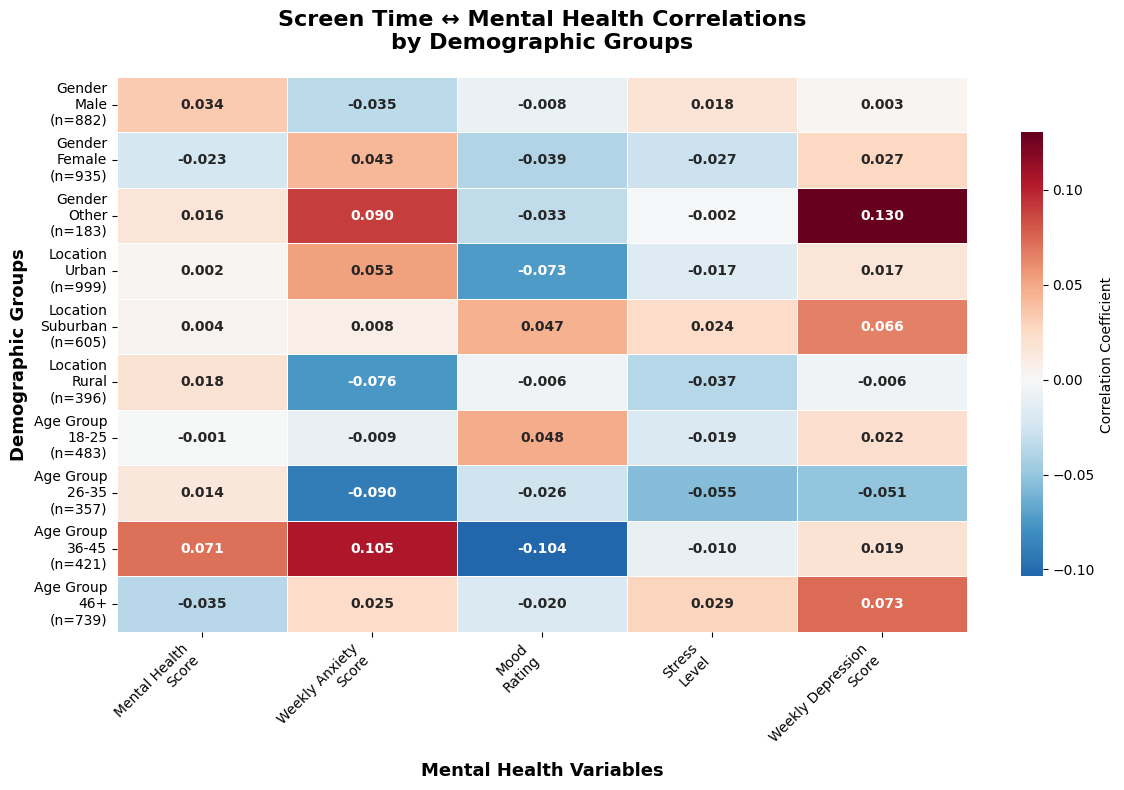


📊 DEMOGRAPHIC CORRELATION SUMMARY

🎯 Top Correlations by Demographic Group:

📍 Gender Male (n=882):
   📈 Strongest Positive: Mental Health Score: 0.034
   📉 Strongest Negative: Weekly Anxiety Score: -0.035
   📏 Range: 0.034 to -0.035

📍 Gender Female (n=935):
   📈 Strongest Positive: Weekly Anxiety Score: 0.043
   📉 Strongest Negative: Mood Rating: -0.039
   📏 Range: 0.043 to -0.039

📍 Gender Other (n=183):
   📈 Strongest Positive: Weekly Depression Score: 0.130
   📉 Strongest Negative: Mood Rating: -0.033
   📏 Range: 0.130 to -0.033

📍 Location Urban (n=999):
   📈 Strongest Positive: Weekly Anxiety Score: 0.053
   📉 Strongest Negative: Mood Rating: -0.073
   📏 Range: 0.053 to -0.073

📍 Location Suburban (n=605):
   📈 Strongest Positive: Weekly Depression Score: 0.066
   📉 Strongest Negative: Mental Health Score: 0.004
   📏 Range: 0.066 to 0.004

📍 Location Rural (n=396):
   📈 Strongest Positive: Mental Health Score: 0.018
   📉 Strongest Negative: Weekly Anxiety Score: -0.076
   📏 Ran

In [72]:
# DEMOGRAPHIC-BASED CORRELATION HEATMAP
print("🔥 DEMOGRAPHIC GROUP CORRELATION ANALYSIS")
print("="*55)

# Create age groups for better analysis
df['age_group_detailed'] = pd.cut(df['age'], 
                                 bins=[0, 25, 35, 45, 100], 
                                 labels=['18-25', '26-35', '36-45', '46+'])

# Prepare correlation data for different demographic groups
demographic_groups = {
    'Gender': ['Male', 'Female', 'Other'],
    'Location': ['Urban', 'Suburban', 'Rural'], 
    'Age Group': ['18-25', '26-35', '36-45', '46+']
}

# Calculate correlations for each demographic group
correlation_matrix_data = []
group_labels = []

for demo_type, groups in demographic_groups.items():
    for group in groups:
        if demo_type == 'Gender':
            group_data = df[df['gender'] == group]
        elif demo_type == 'Location':
            group_data = df[df['location_type'] == group]  
        elif demo_type == 'Age Group':
            group_data = df[df['age_group_detailed'] == group]
        
        if len(group_data) > 20:  # Ensure sufficient sample size
            group_correlations = []
            for mental_var in mental_health_vars:
                corr = group_data['daily_screen_time_hours'].corr(group_data[mental_var])
                group_correlations.append(corr)
            
            correlation_matrix_data.append(group_correlations)
            group_labels.append(f"{demo_type}\n{group}\n(n={len(group_data)})")

# Convert to numpy array for heatmap
correlation_matrix = np.array(correlation_matrix_data)

# Mental health variable names for heatmap
mental_vars_clean = ['Mental Health\nScore', 'Weekly Anxiety\nScore', 'Mood\nRating', 
                    'Stress\nLevel', 'Weekly Depression\nScore']

# Create the heatmap
plt.figure(figsize=(12, 8))

# Create heatmap with custom colormap
sns.heatmap(correlation_matrix, 
            xticklabels=mental_vars_clean,
            yticklabels=group_labels,
            annot=True, 
            fmt='.3f',
            cmap='RdBu_r',
            center=0,
            square=False,
            linewidths=0.5,
            cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
            annot_kws={'size': 10, 'weight': 'bold'})

plt.title('Screen Time ↔ Mental Health Correlations\nby Demographic Groups', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mental Health Variables', fontsize=13, fontweight='bold')
plt.ylabel('Demographic Groups', fontsize=13, fontweight='bold')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Tight layout
plt.tight_layout()
plt.show()

# Statistical summary by demographics
print(f"\n📊 DEMOGRAPHIC CORRELATION SUMMARY")
print("="*45)

# Find strongest correlations by demographic
strongest_correlations = []
for i, group_label in enumerate(group_labels):
    group_corrs = correlation_matrix[i]
    max_pos_idx = np.argmax(group_corrs)
    min_neg_idx = np.argmin(group_corrs)
    
    strongest_correlations.append({
        'Group': group_label.replace('\n', ' '),
        'Strongest_Positive': f"{mental_vars_clean[max_pos_idx].replace(chr(10), ' ')}: {group_corrs[max_pos_idx]:.3f}",
        'Strongest_Negative': f"{mental_vars_clean[min_neg_idx].replace(chr(10), ' ')}: {group_corrs[min_neg_idx]:.3f}",
        'Range': f"{group_corrs.max():.3f} to {group_corrs.min():.3f}"
    })

# Display summary table
summary_df = pd.DataFrame(strongest_correlations)
print("\n🎯 Top Correlations by Demographic Group:")
for idx, row in summary_df.iterrows():
    print(f"\n📍 {row['Group']}:")
    print(f"   📈 Strongest Positive: {row['Strongest_Positive']}")
    print(f"   📉 Strongest Negative: {row['Strongest_Negative']}")
    print(f"   📏 Range: {row['Range']}")

# Overall insights
print(f"\n💡 KEY INSIGHTS:")
all_correlations = correlation_matrix.flatten()
strong_correlations = np.abs(all_correlations) > 0.3
moderate_correlations = (np.abs(all_correlations) > 0.1) & (np.abs(all_correlations) <= 0.3)
weak_correlations = np.abs(all_correlations) <= 0.1

print(f"🔴 Strong correlations (|r| > 0.3): {np.sum(strong_correlations)} out of {len(all_correlations)}")
print(f"🟡 Moderate correlations (0.1 < |r| ≤ 0.3): {np.sum(moderate_correlations)} out of {len(all_correlations)}")
print(f"🟢 Weak correlations (|r| ≤ 0.1): {np.sum(weak_correlations)} out of {len(all_correlations)}")

print(f"\n🎭 Demographic with highest variation: {group_labels[np.argmax([np.std(row) for row in correlation_matrix])]}")
print(f"🎭 Most consistent demographic: {group_labels[np.argmin([np.std(row) for row in correlation_matrix])]}")
